In [1]:
import warnings
warnings.filterwarnings("ignore")

from prop_comparison_methods import *

In [2]:
#specify the genotype for which you want to do the analysis
genotype = 'ecadGFPnbG4'
#genotype = 'ecadGFPnbG4myoVI'

In [3]:
#setting color scheme for this notebook

devstage_map = {
                "96hAEL":"96hAEL",
                "120hAEL":"120hAEL",
                "upcrawling":"wL3",
                "whitePupa":"0hAPF",
                "2hAPF":"2hAPF",
                "4hAPF":"4hAPF",
                "6hAPF":"6hAPF",
               }

color_dict = {
              '96hAEL':'#f1ef81',
              '120hAEL':'#efa636',
              'wL3':'#414243',
              '0hAPF':'#7d99cd', 
              '2hAPF':'#64a9dd', 
              '4hAPF':'#78cfdb',
              '6hAPF':'#71c382',
              'DV' : 'purple',
              'outDV' : 'green',
             }

columns = ['devstage', 'discName', 'region', 'k_dist', 
           'area','neighbour_number','elongation_tensor_norm_max', 
           'Qrr_geom_inPlane', 'Qphiphi', 'Qnn', 'Qrphi', 'Qrn', 'Qphin',
           'countInBin', 'cumcount',
           'k_dist_pathlength', #'k_dist_pathlength_poly' 
          ]

rois = ['outDV', 'DV']
devstages = ["96hAEL","wL3","0hAPF","2hAPF","4hAPF","6hAPF",]



In [4]:
df = pd.read_pickle('../exp_data/DFallDiscsIncreaselimitcounts.pkl')
#df = df[df['genotype'] == 'ecadGFPnbG4']
df = df[df['genotype'] == genotype]
df["devstage"] = [devstage_map[x] for x in df["devstage"].values]
df = df[columns]

In [5]:
df.head(3)

,devstage,discName,region,k_dist,area,neighbour_number,elongation_tensor_norm_max,Qrr_geom_inPlane,Qphiphi,Qnn,Qrphi,Qrn,Qphin,countInBin,cumcount,k_dist_pathlength
0,96hAEL,20220517_ecadGFPnbG4_96hAEL_disc8_outDV,outDV,13,1.646873,4,0.079496,-0.065859,0.056459,0.009400,0.031090,0.003897,0.033033,42.0,288.0,28.560460
1,96hAEL,20220517_ecadGFPnbG4_96hAEL_disc8_outDV,outDV,13,6.991516,7,0.297667,-0.280260,0.288938,-0.008678,-0.057726,-0.009983,0.029122,42.0,288.0,31.961953
2,96hAEL,20220517_ecadGFPnbG4_96hAEL_disc8_outDV,outDV,13,9.529885,6,0.178425,-0.039228,0.051418,-0.012190,-0.165394,-0.004449,0.012512,42.0,288.0,32.296625


### For each disc, compute average quantities in rings

In [6]:
groupby_cols = ['devstage', 'region', 'discName', 'k_dist']
#here we pool cells within a ring and calculate the mean and std
df_pool_k = df.groupby(groupby_cols).agg('mean').reset_index() 
#we offset k_dist values if the rings do not start with k_dits = 0
k_dist_offset = df.groupby(['discName']).k_dist.agg('min')#.reset_index().set_index('discName') #some discs can have k starting from non-zero value, so we offset them by the starting k
df_pool_k['k_dist'] = df_pool_k['k_dist'] - k_dist_offset[df_pool_k['discName'].values].values #offsetting k values


#scale pathlength
pathlength_max = df_pool_k.groupby(['discName']).k_dist_pathlength.agg('max')
df_pool_k['pathlength_scaled'] = df_pool_k['k_dist_pathlength']/pathlength_max[df_pool_k['discName'].values].values

In [7]:
df_pool_k

,devstage,region,discName,k_dist,area,neighbour_number,elongation_tensor_norm_max,Qrr_geom_inPlane,Qphiphi,Qnn,Qrphi,Qrn,Qphin,countInBin,cumcount,k_dist_pathlength,pathlength_scaled
0,0hAPF,DV,20201022_ecadGFPnbG4_whitepupa_disc1_DV,0,7.046083,4.666667,0.277725,-0.025823,0.026297,-0.000474,0.225422,0.006824,0.002120,3.000000,3.00000,0.000000,0.000000
1,0hAPF,DV,20201022_ecadGFPnbG4_whitepupa_disc1_DV,1,8.485620,5.800000,0.191811,-0.099231,0.100169,-0.000937,0.087789,-0.000811,-0.001059,5.000000,8.00000,2.880560,0.032118
2,0hAPF,DV,20201022_ecadGFPnbG4_whitepupa_disc1_DV,2,6.974827,6.250000,0.233407,-0.029457,0.029898,-0.000441,0.118729,-0.001962,0.000164,8.000000,16.00000,6.077616,0.067765
3,0hAPF,DV,20201022_ecadGFPnbG4_whitepupa_disc1_DV,3,6.514719,5.700000,0.222431,0.032543,-0.031381,-0.001163,-0.035350,-0.002401,-0.001514,10.000000,26.00000,9.901794,0.110405
4,0hAPF,DV,20201022_ecadGFPnbG4_whitepupa_disc1_DV,4,7.618575,6.125000,0.233202,0.078570,-0.076815,-0.001755,-0.061113,-0.003959,-0.000920,8.000000,34.00000,13.259157,0.147839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,wL3,outDV,20210706_ecadGFPnbG4_upcrawling_disc3_outDV,17,5.657851,5.794872,NaN,-0.002095,0.002664,-0.000569,-0.001141,0.000810,0.000725,58.606838,558.08547,48.075594,0.789949
2004,wL3,outDV,20210706_ecadGFPnbG4_upcrawling_disc3_outDV,18,5.994934,5.872000,NaN,0.038457,-0.037765,-0.000692,0.003522,0.000486,-0.000149,62.504000,620.52000,51.161645,0.840657
2005,wL3,outDV,20210706_ecadGFPnbG4_upcrawling_disc3_outDV,19,5.486113,5.735294,NaN,-0.001509,0.002056,-0.000547,0.035973,0.000045,0.000421,68.000000,686.00000,54.375402,0.893464
2006,wL3,outDV,20210706_ecadGFPnbG4_upcrawling_disc3_outDV,20,6.636398,6.093750,NaN,-0.010464,0.011134,-0.000670,0.045576,0.001270,0.000247,64.000000,750.00000,57.464953,0.944229


In [8]:
#compute Qnorm

#function to compute area weighted average
wm = lambda x: np.average(x, weights=df.loc[x.index, "area"])

df_pool_areaWeighted_k = df.groupby(groupby_cols).agg(Qrr_geom_inPlane = pd.NamedAgg(column = 'Qrr_geom_inPlane', aggfunc = wm),
                                                      Qrphi = pd.NamedAgg(column = 'Qrphi', aggfunc = wm),
                                                      Qphiphi = pd.NamedAgg(column = 'Qphiphi', aggfunc = wm),
                                                     ).reset_index() 
df_pool_k[["Qrr_geom_inPlane", "Qrphi", "Qphiphi"]] = df_pool_areaWeighted_k[["Qrr_geom_inPlane", "Qrphi", "Qphiphi"]]

df_pool_k['Qnorm'] = np.sqrt(df_pool_k['Qrr_geom_inPlane']**2 + df_pool_k['Qrphi']**2)
df_pool_k['exp_signed_Qnorm'] = np.exp(np.sign(df_pool_k['Qrr_geom_inPlane'])*df_pool_k['Qnorm'])

### For each developmental stage, average over discs

In [9]:
groupby_cols = ['devstage', 'region', 'k_dist']
#here we pool discs within a devstage and calculate the mean and std
df_pool_devstage = df_pool_k.groupby(groupby_cols).agg(['mean', 'std']).reset_index()
colnames = [x[0]+'_'+x[1] if x[0] not in groupby_cols else x[0] for x in df_pool_devstage.columns]
df_pool_devstage.columns = colnames #removing multi-indexing

df_pool_devstage.head()

,devstage,region,k_dist,area_mean,area_std,neighbour_number_mean,neighbour_number_std,elongation_tensor_norm_max_mean,elongation_tensor_norm_max_std,Qrr_geom_inPlane_mean,...,cumcount_mean,cumcount_std,k_dist_pathlength_mean,k_dist_pathlength_std,pathlength_scaled_mean,pathlength_scaled_std,Qnorm_mean,Qnorm_std,exp_signed_Qnorm_mean,exp_signed_Qnorm_std
0,0hAPF,DV,0,6.138776,1.899830,5.600000,0.565685,0.236052,0.074967,-0.057797,...,2.419048,0.626234,0.000000,0.000000,0.000000,0.000000,0.149957,0.095187,0.886789,0.113648
1,0hAPF,DV,1,7.049269,0.976519,5.859694,0.240154,0.214965,0.057095,-0.044956,...,7.296806,1.024164,2.740585,0.197002,0.032208,0.001434,0.077995,0.032937,0.936688,0.052501
2,0hAPF,DV,2,6.803410,0.972501,5.862647,0.250389,0.249500,0.057656,0.014085,...,13.939177,1.583098,5.952463,0.394122,0.070055,0.004719,0.065115,0.034069,1.028614,0.074245
3,0hAPF,DV,3,6.795584,1.264079,5.936568,0.161895,0.220404,0.025238,0.047206,...,20.804262,2.786416,9.463610,0.746017,0.111466,0.010186,0.071269,0.024236,1.057808,0.055874
4,0hAPF,DV,4,6.757545,1.057610,6.004347,0.113781,0.224231,0.026976,0.070369,...,27.901782,3.594859,12.758039,1.085376,0.150217,0.013863,0.087803,0.050519,1.088082,0.063606


In [10]:
#compute Qnorm
df_pool_devstage['Qnorm_mean'] =  np.sqrt( df_pool_devstage['Qrr_geom_inPlane_mean']**2 + df_pool_devstage['Qrphi_mean']**2)#Norm of mean
df_pool_devstage['Qnorm_std'] = (df_pool_devstage['Qrr_geom_inPlane_mean']*df_pool_devstage['Qrr_geom_inPlane_std'] + df_pool_devstage['Qrphi_mean']*df_pool_devstage['Qrphi_std'])/df_pool_devstage['Qnorm_mean']

df_pool_devstage['exp_signed_Qnorm_mean'] = np.exp(np.sign(df_pool_devstage['Qrr_geom_inPlane_mean'])*df_pool_devstage['Qnorm_mean'])
df_pool_devstage['exp_signed_Qnorm_std'] = df_pool_devstage['exp_signed_Qnorm_mean']*df_pool_devstage['Qnorm_std']


## Pathlength analysis

In [11]:
k_scaled_dist_dict = dict() #a dictionary for storing the polynomial object for fitting between fractional pathlength and N

#rois = ["outDV", "DV"]

devstages = ["wL3"]

for i in range(len(rois)):
    
    roi = rois[i]
    
    devstage = "wL3"
    query_str = '(devstage == "' + devstage + '") & (region == "' + roi + '")'
    df_roi_stage = df_pool_devstage.query(query_str)
    coeffs = np.polyfit(df_roi_stage['cumcount_mean'], df_roi_stage['pathlength_scaled_mean'], deg = 5)
    poly_obj = np.poly1d(coeffs)
    k_scaled_dist_dict[roi] = poly_obj #coeffs[1] is supposed to be zero (very small value compared to 1 which is the max value of scaled dist)
    
    
    print(roi + ' ' + devstage)
    print(poly_obj)
    print('\n')

df_pool_k["ref_pathlength_scaled"] = df_pool_k.apply(lambda row: k_scaled_dist_dict[row['region']](row["cumcount"]),axis = 1)
df_pool_devstage["ref_pathlength_scaled"] = df_pool_devstage.apply(lambda row: k_scaled_dist_dict[row['region']](row['cumcount_mean']),axis = 1)

outDV wL3
           5             4             3             2
1.423e-14 x - 3.429e-11 x + 3.118e-08 x - 1.353e-05 x + 0.003774 x + 0.02833


DV wL3
           5             4             3             2
2.198e-11 x - 8.929e-09 x + 1.177e-06 x - 4.517e-05 x + 0.005864 x - 0.01881




[]

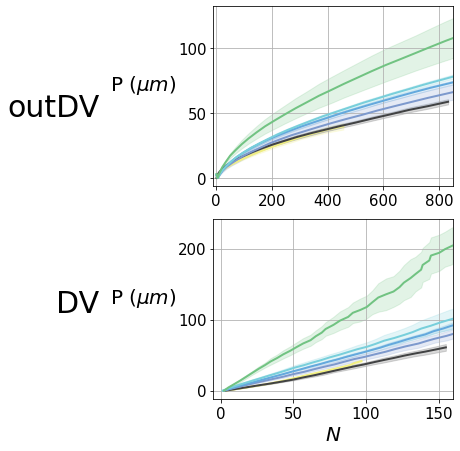

In [12]:
#rois = ['outDV', 'DV']
#devstages = ['upcrawling','whitePupa','2hAPF','4hAPF']

#devstages = ['upcrawling']

devstages = ["96hAEL","wL3","0hAPF","2hAPF","4hAPF","6hAPF",]

nbcols = 1
nbrows = len(rois)

fig,axs = plt.subplots(nbrows, nbcols,
                       figsize = (5.5*nbcols, (10/3)*nbrows)
                      )
main_ax = fig.add_subplot(111, frameon=False)


for i in range(nbrows):
    
    roi = rois[i]
    
    for j in range(len(devstages)):
        
        devstage = devstages[j]
        query_str = '(devstage == "' + devstage + '") & (region == "' + roi + '")'
        
        if nbcols == 1:
            ax = axs[i]
        elif nbrows == 1:
            ax = axs[j]
        else:
            ax = axs[i,j]
            
        title = ''
        ylabel = ''
        xlabel = ''
        xticks = None
        yticks = None
        xlim = None
        ylim = None
        if i == 0:
            title = ''
        if (j == 0) or (nbcols == 1):
            ylabel ='P ' + r'$(\mu m)$'
        if (i == nbrows-1) or (nbrows == 1):
            xlabel = r'$N$'
        if roi == 'DV':
            #xticks = [0, 50, 100, 150]
            #yticks = [0, 10, 20]
            #xlim = (-1, 25)
            xlim = (-5,160)
            #ylim = (-2, 27)
        else:
            #xticks = [0, 250, 500, 750]
            #yticks = [0, 10, 20]
            xlim = (-10,850)
            #xlim = (-1, 25)
            #ylim = (-2, 27)
        
        ax = get_subplot(ax, df = None, #df_pool_k, 
                         stat_df = df_pool_devstage, df_cases_col='discName',
                         query_str = query_str, x_col = 'cumcount', y_col = 'k_dist_pathlength', 
                         xlabel = xlabel, ylabel = ylabel, title = title,
                         xticks = xticks, yticks = yticks, xlim = xlim, ylim = ylim,
                         individual_color=color_dict[devstage],individual_linewidth =1.2, 
                         mean_color=color_dict[devstage],mean_linewidth =2,
                         mean_label=devstage, ylabelpad = 35,
                        )
        
    ax.grid()
    #ax.legend(fontsize = 12)
    
fig.tight_layout()

plt.xlabel('', fontsize = 40, labelpad = 30)
plt.ylabel('', fontsize = 40, labelpad = 70, rotation = 0)

plt.xlim(-0.5,nbcols -0.5)
plt.ylim(-0.5, nbrows -0.5)
        
#tick_intervals_x = col_vals
tick_intervals_y = [0, 1]

#tick_intervals_x_str = [str(round(x,2)) for x in tick_intervals_x]
tick_intervals_y_str = ['DV', 'outDV']

main_ax.tick_params(axis=u'both', which=u'both', length = 0, labelsize = 15, pad = 90, rotation = 0)

#plt.xticks(range(len(col_vals)), tick_intervals_x_str, fontsize = 40)
main_ax.set_yticks(tick_intervals_y)
main_ax.set_yticklabels(tick_intervals_y_str, fontsize = 30, x = -0.1,)

#main_ax.axvline(x = 0.42, color = 'blue', linewidth = 5)

main_ax.set_xticks([])
#plt.yticks([], [], fontsize = 40)



#os.makedirs('plots/',exist_ok=True)
#plt.savefig('plots/k_vs_N.pdf', bbox_inches = 'tight')


[]

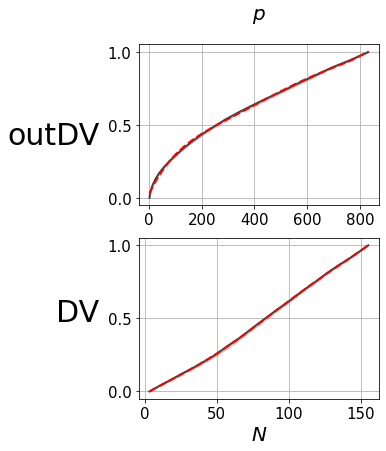

In [13]:
#rois = ['outDV', 'DV']
#devstages = ['upcrawling','whitePupa','2hAPF','4hAPF']
#devstages = ["wL3"]
devstages = ["wL3",]

nbcols = 1
nbrows = len(rois)

fig,axs = plt.subplots(nbrows, nbcols,
                       figsize = (4.5*nbcols, (10/3)*nbrows)
                      )
main_ax = fig.add_subplot(111, frameon=False)


for i in range(nbrows):
    
    roi = rois[i]
    
    for j in range(len(devstages)):
        
        devstage = devstages[j]
        query_str = '(devstage == "' + devstage + '") & (region == "' + roi + '")'
        
        if nbcols == 1:
            ax = axs[i]
        elif nbrows == 1:
            ax = axs[j]
        else:
            ax = axs[i,j]
            
        title = ''
        ylabel = ''
        xlabel = ''
        xticks = None
        yticks = None
        xlim = None
        ylim = None
        if i == 0:
            title = r'$p$'
        if (j == 0) or (nbcols == 1):
            ylabel =''
        if (i == nbrows-1) or (nbrows == 1):
            xlabel = r'$N$'
        if roi == 'DV':
            #xticks = [0, 50, 100, 150]
            yticks = [0, 0.5, 1]
            #xlim = (-1, 22)
            #xlim = (-5,155)
            #ylim = (-2, 27)
        else:
            #xticks = [0, 250, 500, 750]
            yticks = [0, 0.5, 1]
            #xlim = (-10,780)
            #xlim = (-1, 22)
            #ylim = (-2, 27)
        
        ax = get_subplot(ax, df = None, #df_pool_k, 
                         stat_df = df_pool_devstage, df_cases_col='discName',
                         query_str = query_str, x_col = 'cumcount', y_col = 'pathlength_scaled', 
                         xlabel = xlabel, ylabel = ylabel, title = title,
                         xticks = xticks, yticks = yticks, xlim = xlim, ylim = ylim,
                         individual_color=color_dict[devstage],individual_linewidth =1.2, 
                         mean_color=color_dict[devstage],mean_linewidth =2,
                         mean_label=devstage, ylabelpad = 0,
                        )
        
        #fit line
        df_roi_stage = df_pool_devstage.query(query_str)
        ax.plot(df_roi_stage['cumcount_mean'], df_roi_stage['ref_pathlength_scaled'], linestyle = '--', color = "red", linewidth = 2, label = 'fit')
        
    ax.grid(visible=True)
    #ax.legend(fontsize = 20)
    
fig.tight_layout()



plt.xlabel('', fontsize = 40, labelpad = 30)
plt.ylabel('', fontsize = 40, labelpad = 70, rotation = 0)

plt.xlim(-0.5,nbcols -0.5)
plt.ylim(-0.5, nbrows -0.5)
        
#tick_intervals_x = col_vals
tick_intervals_y = [0, 1]

#tick_intervals_x_str = [str(round(x,2)) for x in tick_intervals_x]
tick_intervals_y_str = ['DV', 'outDV']

main_ax.tick_params(axis=u'both', which=u'both', length = 0, labelsize = 15, pad = 15, rotation = 0)

#plt.xticks(range(len(col_vals)), tick_intervals_x_str, fontsize = 40)
main_ax.set_yticks(tick_intervals_y)
main_ax.set_yticklabels(tick_intervals_y_str, fontsize = 30, x = -0.1)

#main_ax.axvline(x = 0.42, color = 'blue', linewidth = 5)

main_ax.set_xticks([])
#plt.yticks([], [], fontsize = 40)



#os.makedirs('plots/',exist_ok=True)
#plt.savefig('plots/k_vs_N.pdf', bbox_inches = 'tight')



In [14]:

devstage = 'wL3'
roi = 'outDV'
query_str = '(devstage == "' + devstage + '") & (region == "' + roi + '")'
df_roi_stage = df_pool_devstage.query(query_str)
max_pathlength_outDV = max(df_roi_stage['k_dist_pathlength_mean'])

roi = 'DV'
query_str = '(devstage == "' + devstage + '") & (region == "' + roi + '")'
df_roi_stage = df_pool_devstage.query(query_str)
max_pathlength_DV = max(df_roi_stage['k_dist_pathlength_mean'])

max_pathlength = (max_pathlength_outDV + max_pathlength_DV)/2


print('Max pathlength at upcrawling stage')
print(max_pathlength)

Max pathlength at upcrawling stage
59.767084126366555


## Area analysis

In [15]:
#creating dataframe to store the analysis

stages_df = pd.DataFrame(columns=["stage", "stage_name", "prop", "value"])

fit_deg = 1

devstage_combinations = pd.DataFrame({'devstage_init':['wL3','wL3','wL3','wL3'],
                                     'devstage_final':['0hAPF','2hAPF','4hAPF','6hAPF'],}
                                    )

[]

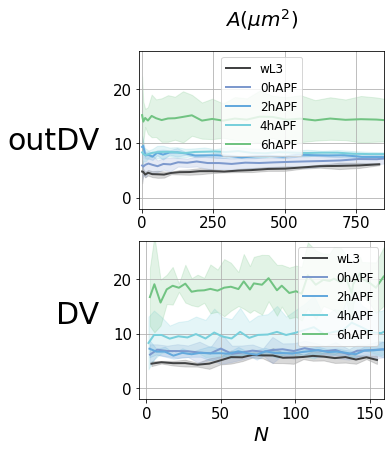

In [16]:
#rois = ['outDV', 'DV']
#devstages = ['upcrawling','whitePupa','2hAPF','4hAPF']
devstages = ["wL3","0hAPF","2hAPF","4hAPF","6hAPF",]

nbcols = 1
nbrows = len(rois)

fig,axs = plt.subplots(nbrows, nbcols,
                       figsize = (4.5*nbcols, (10/3)*nbrows)
                      )
main_ax = fig.add_subplot(111, frameon=False)


for i in range(nbrows):
    
    roi = rois[i]
    
    for j in range(len(devstages)):
        
        devstage = devstages[j]
        query_str = '(devstage == "' + devstage + '") & (region == "' + roi + '")'
        
        if nbcols == 1:
            ax = axs[i]
        elif nbrows == 1:
            ax = axs[j]
        else:
            ax = axs[i,j]
            
        title = ''
        ylabel = ''
        xlabel = ''
        xticks = None
        yticks = None
        xlim = None
        ylim = None
        if i == 0:
            title = r'$A(\mu m^2)$' 
        if (j == 0) or (nbcols == 1):
            ylabel =''
        if (i == nbrows-1) or (nbrows == 1):
            xlabel = r'$N$'
        if roi == 'DV':
            xticks = [0, 50, 100, 150]
            yticks = [0, 10, 20]
            xlim = (-5,160)
            ylim = (-2, 27)
        else:
            xticks = [0, 250, 500, 750,]
            yticks = [0, 10, 20]
            xlim = (-10,850)
            ylim = (-2, 27)
        
        ax = get_subplot(ax, df = None,  #df_pool_k, 
                         stat_df = df_pool_devstage, df_cases_col='discName',
                         query_str = query_str, x_col = 'cumcount', y_col = 'area', 
                         xlabel = xlabel, ylabel = ylabel, title = title,
                         xticks = xticks, yticks = yticks, xlim = xlim, ylim = ylim,
                         individual_color=color_dict[devstage],individual_linewidth =1.2, 
                         mean_color=color_dict[devstage],mean_linewidth =2,
                         mean_label=devstage, ylabelpad = 0,
                        )
        
    ax.grid(visible=True)
    ax.legend(fontsize = 12)
    
fig.tight_layout()

plt.xlabel('', fontsize = 40, labelpad = 30)
plt.ylabel('', fontsize = 40, labelpad = 70, rotation = 0)

plt.xlim(-0.5,nbcols -0.5)
plt.ylim(-0.5, nbrows -0.5)
        
#tick_intervals_x = col_vals
tick_intervals_y = [0, 1]

#tick_intervals_x_str = [str(round(x,2)) for x in tick_intervals_x]
tick_intervals_y_str = ['DV', 'outDV']

main_ax.tick_params(axis=u'both', which=u'both', length = 0, labelsize = 15, pad = 15, rotation = 0)

#plt.xticks(range(len(col_vals)), tick_intervals_x_str, fontsize = 40)
main_ax.set_yticks(tick_intervals_y)
main_ax.set_yticklabels(tick_intervals_y_str, fontsize = 30, x = -0.1)

#main_ax.axvline(x = 0.42, color = 'blue', linewidth = 5)

main_ax.set_xticks([])
#plt.yticks([], [], fontsize = 40)



#os.makedirs('plots/',exist_ok=True)
#plt.savefig('plots/k_vs_N.pdf', bbox_inches = 'tight')


In [17]:


#devstage_combinations = pd.DataFrame({'devstage_init':[#'96hAEL',
#                                                       #'wL3',
#                                                       #'4hAPF',
#                                                       #'wL3','0hAPF','2hAPF', '4hAPF'
#                                                       'wL3','wL3','wL3',
#                                                      ],
#                                     'devstage_final':[#'upcrawling',
#                                                       #'4hAPF',
#                                                       #'6hAPF',
#                                                       #'0hAPF','2hAPF','4hAPF', '6hAPF'
#                                                       '0hAPF','2hAPF','4hAPF', 
#                                                      ],}
#                                    )

prop = 'area'


[area_diff, area_diff_stat] = get_prop_differences(df_pool_k, prop = prop,operation = 'divide-sqrt',
                                                   devstage_combinations=devstage_combinations, 
                                                   fit_param = 'ref_pathlength_scaled_beta_mean',
                                                   fit_deg = fit_deg,
                                                  )



residual 1.151495263049269
residual 3.1739996747668533
residual 2.943549126831552
residual 8.61680451593986
residual 3.669969647448322
residual 1.2290669975378474
residual 0.5649547814489548
residual 3.3543727565358816


[]

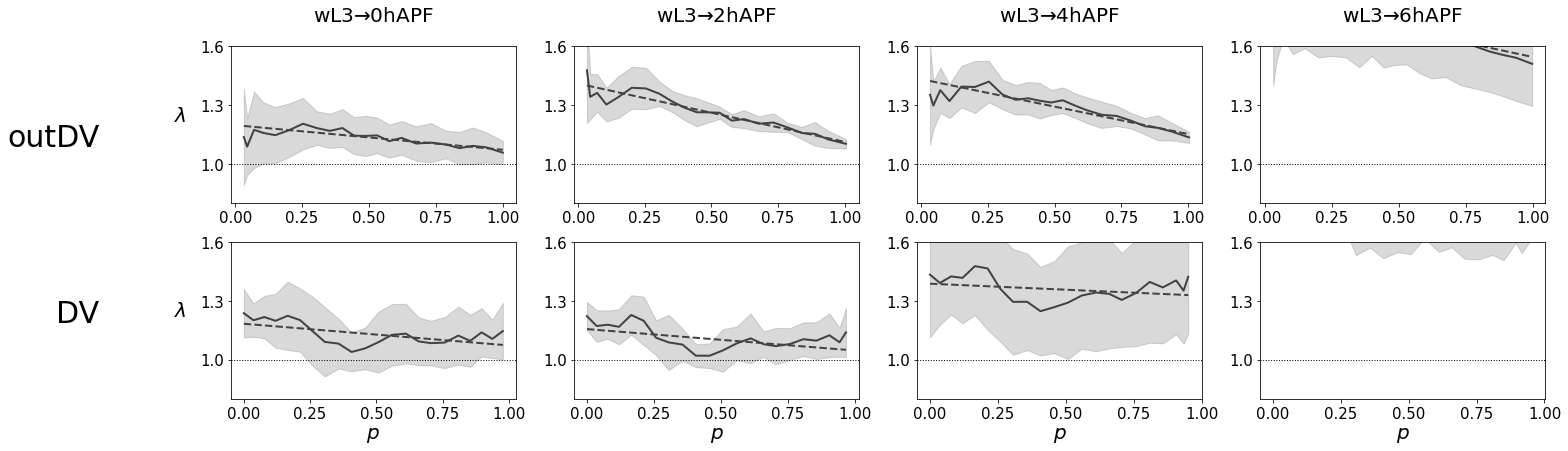

In [18]:
#rois = ['outDV', 'DV']
#devstages = ['upcrawling','whitePupa','2hAPF','4hAPF']


nbcols = len(devstage_combinations)
nbrows = len(rois)

fig,axs = plt.subplots(nbrows, nbcols,
                       figsize = (5*nbcols, (10/3)*nbrows)
                      )
main_ax = fig.add_subplot(111, frameon=False)


for i in range(nbrows):
    
    roi = rois[i]
    
    for j in range(nbcols):
        
        devstage_init = devstage_combinations.loc[j,'devstage_init']
        devstage_final = devstage_combinations.loc[j,'devstage_final']
        
        query_str = '(devstage_init == "' + devstage_init + '") & (devstage_final == "' + devstage_final + '") & (roi == "' + roi + '")'
        
        if nbcols == 1:
            ax = axs[i]
        elif nbrows == 1:
            ax = axs[j]
        else:
            ax = axs[i,j]
            
        title = ''
        ylabel = ''
        xlabel = ''
        xticks = None
        yticks = None
        xlim = None
        ylim = None
        if i == 0:
            title = devstage_init + r'$ \to $' + devstage_final
        if j == 0:
            ylabel = r'$\lambda$'
            #ylabel = ''
        if i == nbrows-1:
            xlabel = r'$p$'
        if roi == 'DV':
            xticks = [0, 0.25, 0.5, 0.75, 1]
            yticks = [1, 1.3, 1.6] 
            #xlim = (0,155)
            ylim = (0.8, 1.6) 
        else:
            xticks = [0, 0.25, 0.5, 0.75, 1]
            yticks = [1,1.3, 1.6]
            #xlim = (0,780)
            ylim = (0.8, 1.6)
        
        ax = get_subplot(ax, df = None, #area_diff, 
                         stat_df = area_diff_stat, query_str = query_str, x_col = 'ref_pathlength_scaled_beta', y_col = prop+'_diff', 
                         mean_color = color_dict[devstage_init], mean_linewidth= 2, mean_alpha = 0.2, #properties of the mean line
                         xlabel = xlabel, ylabel = ylabel, title = title,
                         xticks = xticks, yticks = yticks, xlim = xlim, ylim = ylim,
                         error_style='fill_between'
                        )

        ax = get_subplot(ax, df = None, stat_df = area_diff_stat, query_str = query_str, 
                         x_col_mean='ref_pathlength_scaled_beta_mean', y_col_mean ='fit_'+prop+'_diff',
                         xlabel = xlabel, ylabel = ylabel, title = title, ylabelpad=20,
                         xticks = xticks, yticks = yticks, xlim = xlim, ylim = ylim,
                         mean_linewidth=2,mean_color = color_dict[devstage_init], mean_linestyle='--',
                         error_style = None, mean_label = 'fit',
                        )
        
        #ax.legend()
        ax.grid(visible=False)
        ax.axhline(y = 1, color = 'black', linewidth = 1, linestyle = 'dotted')
        
        
fig.tight_layout()

plt.xlabel('', fontsize = 40, labelpad = 30)
plt.ylabel('', fontsize = 40, labelpad = 70, rotation = 0)

plt.xlim(-0.5,nbcols -0.5)
plt.ylim(-0.5, nbrows -0.5)
        
#tick_intervals_x = col_vals
tick_intervals_y = [0, 1]

#tick_intervals_x_str = [str(round(x,2)) for x in tick_intervals_x]
tick_intervals_y_str = ['DV', 'outDV']

main_ax.tick_params(axis=u'both', which=u'both', length = 0, labelsize = 15, 
                    pad = 0, # if two columns
                    #pad = 30, #if four columns
                    rotation = 0)

#plt.xticks(range(len(col_vals)), tick_intervals_x_str, fontsize = 40)
main_ax.set_yticks(tick_intervals_y)
main_ax.set_yticklabels(tick_intervals_y_str, fontsize = 30, x = -0.1)

#main_ax.axvline(x = 0.42, color = 'blue', linewidth = 5)

main_ax.set_xticks([])
#plt.yticks([], [], fontsize = 40)



#os.makedirs('plots/',exist_ok=True)
#plt.savefig('plots/DDk_Dt_twoPanels.pdf', bbox_inches = 'tight')


In [19]:
#Printing the fit lines

for i in range(len(rois)):
    roi = rois[i]
    
    for j in range(len(devstage_combinations)):
    
        devstage_init = devstage_combinations.loc[j,'devstage_init']
        devstage_final = devstage_combinations.loc[j,'devstage_final']
        query_str = '(devstage_init == "' + devstage_init + '") & (devstage_final == "' + devstage_final + '") & (roi == "' + roi + '")'
        
        df_roi_devstage = area_diff_stat.query(query_str).reset_index(drop = True)
        coeffs = df_roi_devstage.loc[0,'fit_'+ prop + '_coeffs']
        #coeffs = coeffs_orig
        #coeffs[0] = coeffs[0]/k_scaled_dist_dict[roi]
        
        print(roi + ' : ' + devstage_init + ' to ' + devstage_final)
        #print('x = scaled in-surface distance')
        #to convert from k to scaled dist, we divide by the slope m where P_scaled = m.k_dist
        #assuming straight line
        print(np.poly1d(coeffs))
        #assuming straight line
        print('\n')
        
        if roi == 'DV':
            prop_name = "inDV_lambda_isotropic_coeffs"
        else:
            prop_name = "lambda_isotropic_coeffs"
            
        row = pd.DataFrame({
            'stage' : j,
            'stage_init' : devstage_init,
            'stage_final' : devstage_final,
            'stage_name' : devstage_init + " to " + devstage_final,
            'prop' : prop_name,
            'value' : [coeffs],
        })
        stages_df = pd.concat([stages_df, row])
        
        

outDV : wL3 to 0hAPF
 
-0.1254 x + 1.198


outDV : wL3 to 2hAPF
 
-0.297 x + 1.41


outDV : wL3 to 4hAPF
 
-0.2792 x + 1.432


outDV : wL3 to 6hAPF
 
-0.2923 x + 1.838


DV : wL3 to 0hAPF
 
-0.1109 x + 1.183


DV : wL3 to 2hAPF
 
-0.1094 x + 1.156


DV : wL3 to 4hAPF
 
-0.06108 x + 1.387


DV : wL3 to 6hAPF
 
-0.2301 x + 1.967




In [20]:
stages_df

,stage,stage_name,prop,value,stage_init,stage_final
0,0,wL3 to 0hAPF,lambda_isotropic_coeffs,"[-0.12536333465535154, 1.1981540612790458]",wL3,0hAPF
0,1,wL3 to 2hAPF,lambda_isotropic_coeffs,"[-0.2970211895816658, 1.410022891459207]",wL3,2hAPF
0,2,wL3 to 4hAPF,lambda_isotropic_coeffs,"[-0.279182392807545, 1.4324288503319111]",wL3,4hAPF
0,3,wL3 to 6hAPF,lambda_isotropic_coeffs,"[-0.29226315285249244, 1.8384629963342203]",wL3,6hAPF
0,0,wL3 to 0hAPF,inDV_lambda_isotropic_coeffs,"[-0.11088804279350317, 1.1830258124000763]",wL3,0hAPF
0,1,wL3 to 2hAPF,inDV_lambda_isotropic_coeffs,"[-0.10943282024192554, 1.1557567679454885]",wL3,2hAPF
0,2,wL3 to 4hAPF,inDV_lambda_isotropic_coeffs,"[-0.0610788339067234, 1.3871795547010992]",wL3,4hAPF
0,3,wL3 to 6hAPF,inDV_lambda_isotropic_coeffs,"[-0.2301064528518971, 1.9673985935230642]",wL3,6hAPF


## Elongation analysis

[]

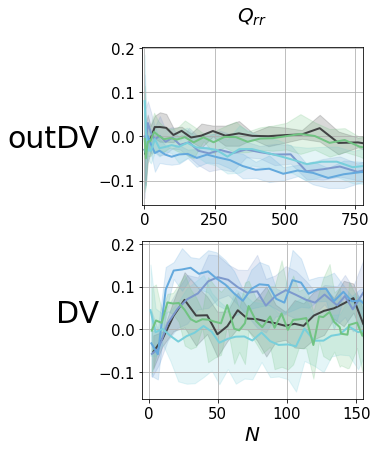

In [21]:
#rois = ['outDV', 'DV']
#devstages = ['upcrawling','whitePupa','2hAPF','4hAPF']


nbcols = 1
nbrows = len(rois)

fig,axs = plt.subplots(nbrows, nbcols,
                       figsize = (4.5*nbcols, (10/3)*nbrows)
                      )
main_ax = fig.add_subplot(111, frameon=False)


for i in range(nbrows):
    
    roi = rois[i]
    
    for j in range(len(devstages)):
        
        devstage = devstages[j]
        query_str = '(devstage == "' + devstage + '") & (region == "' + roi + '")'
        
        if nbcols == 1:
            ax = axs[i]
        elif nbrows == 1:
            ax = axs[j]
        else:
            ax = axs[i,j]
            
        title = ''
        ylabel = ''
        xlabel = ''
        xticks = None
        yticks = None
        xlim = None
        ylim = None
        if i == 0:
            title = r'$Q_{rr}$'
        if (j == 0) or (nbcols == 1):
            ylabel = ''
        if (i == nbrows-1) or (nbrows == 1):
            xlabel = r'$N$'
        if roi == 'DV':
            xticks = [0, 50, 100, 150]
            #yticks = [0, 10, 20]
            xlim = (-5,155)
            #ylim = (-2, 27)
        else:
            xticks = [0, 250, 500, 750]
            #yticks = [0, 10, 20]
            xlim = (-10,780)
            #ylim = (-2, 27)
        
        ax = get_subplot(ax, df = None, #df_pool_k, 
                         stat_df = df_pool_devstage, df_cases_col='discName',
                         query_str = query_str, x_col = 'cumcount', y_col = 'Qrr_geom_inPlane', 
                         xlabel = xlabel, ylabel = ylabel, title = title,
                         xticks = xticks, yticks = yticks, xlim = xlim, ylim = ylim,
                         individual_color=color_dict[devstage],individual_linewidth =1.2, 
                         mean_color=color_dict[devstage],mean_linewidth =2,
                         mean_label=devstage, ylabelpad = 0,
                        )
        
    ax.grid(visible = True)
    #ax.legend(fontsize = 12)
    
fig.tight_layout()

plt.xlabel('', fontsize = 40, labelpad = 30)
plt.ylabel('', fontsize = 40, labelpad = 100, rotation = 0)

plt.xlim(-0.5,nbcols -0.5)
plt.ylim(-0.5, nbrows -0.5)
        
#tick_intervals_x = col_vals
tick_intervals_y = [0, 1]

#tick_intervals_x_str = [str(round(x,2)) for x in tick_intervals_x]
tick_intervals_y_str = ['DV', 'outDV']

main_ax.tick_params(axis=u'both', which=u'both', length = 0, labelsize = 15, pad = 20, rotation = 0)

#plt.xticks(range(len(col_vals)), tick_intervals_x_str, fontsize = 40)
main_ax.set_yticks(tick_intervals_y)
main_ax.set_yticklabels(tick_intervals_y_str, fontsize = 30, x = -0.1)

#main_ax.axvline(x = 0.42, color = 'blue', linewidth = 5)

main_ax.set_xticks([])
#plt.yticks([], [], fontsize = 40)



#os.makedirs('plots/',exist_ok=True)
#plt.savefig('plots/k_vs_N.pdf', bbox_inches = 'tight')


[]

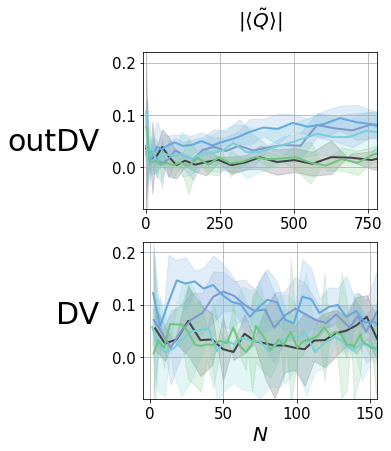

In [22]:
#rois = ['outDV', 'DV']
#devstages = ['upcrawling','whitePupa','2hAPF','4hAPF']


nbcols = 1
nbrows = len(rois)

fig,axs = plt.subplots(nbrows, nbcols,
                       figsize = (4.5*nbcols, (10/3)*nbrows)
                      )
main_ax = fig.add_subplot(111, frameon=False)


for i in range(nbrows):
    
    roi = rois[i]
    
    for j in range(len(devstages)):
        
        devstage = devstages[j]
        query_str = '(devstage == "' + devstage + '") & (region == "' + roi + '")'
        
        if nbcols == 1:
            ax = axs[i]
        elif nbrows == 1:
            ax = axs[j]
        else:
            ax = axs[i,j]
            
        title = ''
        ylabel = ''
        xlabel = ''
        xticks = None
        yticks = None
        xlim = None
        ylim = None
        if i == 0:
            title = r'$|\langle  \tilde{Q} \rangle |$'
        if (j == 0) or (nbcols == 1):
            ylabel =''
        if (i == nbrows-1) or (nbrows == 1):
            xlabel = r'$N$'
        if roi == 'DV':
            xticks = [0, 50, 100, 150]
            #yticks = [0, 10, 20]
            xlim = (-5,155)
            ylim = (-0.08, 0.22)
        else:
            xticks = [0, 250, 500, 750]
            #yticks = [0, 10, 20]
            xlim = (-10,780)
            ylim = (-0.08, 0.22)
        
        ax = get_subplot(ax, df = None, #df_pool_k, 
                         stat_df = df_pool_devstage, df_cases_col='discName',
                         query_str = query_str, x_col = 'cumcount', y_col = 'Qnorm', 
                         xlabel = xlabel, ylabel = ylabel, title = title,
                         xticks = xticks, yticks = yticks, xlim = xlim, ylim = ylim,
                         individual_color=color_dict[devstage],individual_linewidth =1.2, 
                         mean_color=color_dict[devstage],mean_linewidth =2,
                         mean_label=devstage, ylabelpad = 0,
                        )
        
    ax.grid(visible = True)
    #ax.legend(fontsize = 12)
    
fig.tight_layout()

plt.xlabel('', fontsize = 40, labelpad = 30)
plt.ylabel('', fontsize = 40, labelpad = 70, rotation = 0)

plt.xlim(-0.5,nbcols -0.5)
plt.ylim(-0.5, nbrows -0.5)
        
#tick_intervals_x = col_vals
tick_intervals_y = [0, 1]

#tick_intervals_x_str = [str(round(x,2)) for x in tick_intervals_x]
tick_intervals_y_str = ['DV', 'outDV']

main_ax.tick_params(axis=u'both', which=u'both', length = 0, labelsize = 15, pad = 20, rotation = 0)

#plt.xticks(range(len(col_vals)), tick_intervals_x_str, fontsize = 40)
main_ax.set_yticks(tick_intervals_y)
main_ax.set_yticklabels(tick_intervals_y_str, fontsize = 30, x = -0.1)

#main_ax.axvline(x = 0.42, color = 'blue', linewidth = 5)

main_ax.set_xticks([])
#plt.yticks([], [], fontsize = 40)



#os.makedirs('plots/',exist_ok=True)
#plt.savefig('plots/k_vs_N.pdf', bbox_inches = 'tight')


[]

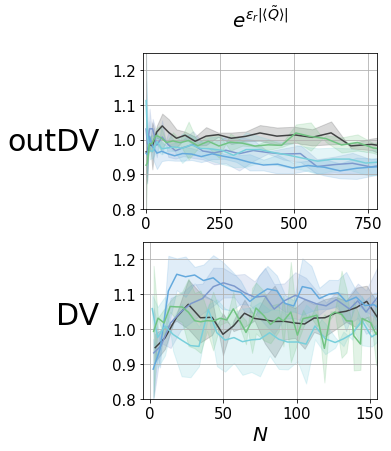

In [23]:
#rois = ['outDV', 'DV']
#devstages = ['upcrawling','whitePupa','2hAPF','4hAPF']


nbcols = 1
nbrows = len(rois)

fig,axs = plt.subplots(nbrows, nbcols,
                       figsize = (4.5*nbcols, (10/3)*nbrows)
                      )
main_ax = fig.add_subplot(111, frameon=False)


for i in range(nbrows):
    
    roi = rois[i]
    
    for j in range(len(devstages)):
        
        devstage = devstages[j]
        query_str = '(devstage == "' + devstage + '") & (region == "' + roi + '")'
        
        if nbcols == 1:
            ax = axs[i]
        elif nbrows == 1:
            ax = axs[j]
        else:
            ax = axs[i,j]
            
        title = ''
        ylabel = ''
        xlabel = ''
        xticks = None
        yticks = None
        xlim = None
        ylim = None
        if i == 0:
            title = r'$e^{\epsilon_r|\langle  \tilde{Q} \rangle | }$'
        if (j == 0) or (nbcols == 1):
            ylabel = ''
        if (i == nbrows-1) or (nbrows == 1):
            xlabel = r'$N$'
        if roi == 'DV':
            xticks = [0, 50, 100, 150]
            #yticks = [0, 10, 20]
            xlim = (-5,155)
            ylim = (0.8, 1.25)
        else:
            xticks = [0, 250, 500, 750]
            #yticks = [0, 10, 20]
            xlim = (-10,780)
            ylim = (0.8, 1.25)
        
        ax = get_subplot(ax, df = None, #df_pool_k, 
                         stat_df = df_pool_devstage, df_cases_col='discName',
                         query_str = query_str, x_col = 'cumcount', y_col = 'exp_signed_Qnorm', 
                         xlabel = xlabel, ylabel = ylabel, title = title,
                         xticks = xticks, yticks = yticks, xlim = xlim, ylim = ylim,
                         individual_color=color_dict[devstage],individual_linewidth =1.2, 
                         mean_color=color_dict[devstage],mean_linewidth =1.5,
                         mean_label=devstage, ylabelpad = 0,
                        )
        
    ax.grid(visible = True)
    #ax.legend(fontsize = 12)
    
fig.tight_layout()

plt.xlabel('', fontsize = 40, labelpad = 30)
plt.ylabel('', fontsize = 40, labelpad = 70, rotation = 0)

plt.xlim(-0.5,nbcols -0.5)
plt.ylim(-0.5, nbrows -0.5)
        
#tick_intervals_x = col_vals
tick_intervals_y = [0, 1]

#tick_intervals_x_str = [str(round(x,2)) for x in tick_intervals_x]
tick_intervals_y_str = ['DV', 'outDV']

main_ax.tick_params(axis=u'both', which=u'both', length = 0, labelsize = 15, pad = 20, rotation = 0)

#plt.xticks(range(len(col_vals)), tick_intervals_x_str, fontsize = 40)
main_ax.set_yticks(tick_intervals_y)
main_ax.set_yticklabels(tick_intervals_y_str, fontsize = 30, x = -0.1)

#main_ax.axvline(x = 0.42, color = 'blue', linewidth = 5)

main_ax.set_xticks([])
#plt.yticks([], [], fontsize = 40)



#os.makedirs('plots/',exist_ok=True)
#plt.savefig('plots/k_vs_N.pdf', bbox_inches = 'tight')


In [24]:
#devstage_combinations = pd.DataFrame({'devstage_init':[#'96hAEL',
#                                                       'wL3',
#                                                       '4hAPF',
#                                                       #'wL3','0hAPF','2hAPF', '4hAPF'
#                                                      ],
#                                     'devstage_final':[#'upcrawling',
#                                                       '4hAPF',
#                                                       '6hAPF',
#                                                       #'0hAPF','2hAPF','4hAPF', '6hAPF'
#                                                      ],}
#                                    )
#
prop = 'exp_signed_Qnorm'


[el_diff, el_diff_stat] = get_prop_differences(df_pool_k, prop = prop,operation = 'divide',
                                                   devstage_combinations=devstage_combinations,
                                                   fit_param='ref_pathlength_scaled_beta_mean',
                                               fit_deg=fit_deg
                                              )


residual 5.028941768399415
residual 6.585278137171979
residual 7.626278739655285
residual 7.371340921530479
residual 4.06714283203623
residual 1.2783647730281096
residual 2.239166476477393
residual 2.5348956389266166


[]

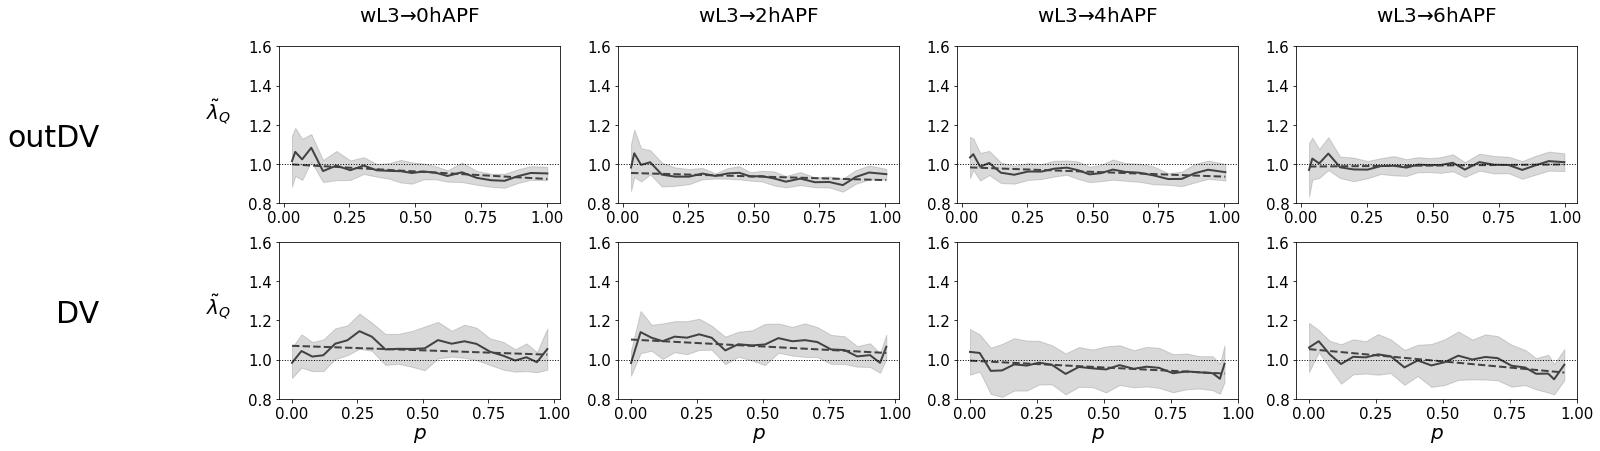

In [25]:
#rois = ['outDV', 'DV']
#devstages = ['upcrawling','whitePupa','2hAPF','4hAPF']


nbcols = len(devstage_combinations)
nbrows = len(rois)

fig,axs = plt.subplots(nbrows, nbcols,
                       figsize = (5*nbcols, (10/3)*nbrows)
                      )
main_ax = fig.add_subplot(111, frameon=False)


for i in range(nbrows):
    
    roi = rois[i]
    
    for j in range(nbcols):
        
        devstage_init = devstage_combinations.loc[j,'devstage_init']
        devstage_final = devstage_combinations.loc[j,'devstage_final']
        
        query_str = '(devstage_init == "' + devstage_init + '") & (devstage_final == "' + devstage_final + '") & (roi == "' + roi + '")'
        
        if nbcols == 1:
            ax = axs[i]
        elif nbrows == 1:
            ax = axs[j]
        else:
            ax = axs[i,j]
            
        title = ''
        ylabel = ''
        xlabel = ''
        xticks = None
        yticks = None
        xlim = None
        ylim = None
        if i == 0:
            title = devstage_init + r'$ \to $' + devstage_final
        if j == 0:
            ylabel = r'$\tilde{\lambda}_{Q}$'
        if i == nbrows-1:
            xlabel = r'$p$'
        if roi == 'DV':
            xticks = [0, 0.25, 0.5, 0.75, 1]
            #yticks = [0.8,0.9,1,1.1, 1.2 ] 
            #xlim = (0,155)
            ylim = (0.8, 1.6) 
        else:
            xticks = [0, 0.25, 0.5, 0.75, 1]
            #yticks = [0.8, 0.9, 1, 1.1, 1.2]
            #xlim = (0,780)
            ylim = (0.8, 1.6)
        
        ax = get_subplot(ax, df = None, #el_diff, 
                         stat_df = el_diff_stat, query_str = query_str, x_col = 'ref_pathlength_scaled_beta', y_col = prop+'_diff', 
                         mean_color = color_dict[devstage_init], mean_linewidth= 2, mean_alpha = 0.2, #properties of the mean line
                         xlabel = xlabel, ylabel = ylabel, title = title,
                         xticks = xticks, yticks = yticks, xlim = xlim, ylim = ylim,
                         error_style='fill_between'
                        )

        ax = get_subplot(ax, df = None, stat_df = el_diff_stat, query_str = query_str, 
                         x_col_mean='ref_pathlength_scaled_beta_mean', y_col_mean ='fit_'+prop+'_diff',
                         xlabel = xlabel, ylabel = ylabel, title = title, ylabelpad=30,
                         xticks = xticks, yticks = yticks, xlim = xlim, ylim = ylim,
                         mean_linewidth=2,mean_color = color_dict[devstage_init], mean_linestyle='--',
                         error_style = None, mean_label = 'fit'
                        )
        
        #ax.legend()
        ax.grid(visible=False)
        ax.axhline(y = 1, color = "black", linewidth=1, linestyle='dotted')
        
        
fig.tight_layout()

plt.xlabel('', fontsize = 40, labelpad = 30)
plt.ylabel('', fontsize = 40, labelpad = 70, rotation = 0)

plt.xlim(-0.5,nbcols -0.5)
plt.ylim(-0.5, nbrows -0.5)
        
#tick_intervals_x = col_vals
tick_intervals_y = [0, 1]

#tick_intervals_x_str = [str(round(x,2)) for x in tick_intervals_x]
tick_intervals_y_str = ['DV', 'outDV']

main_ax.tick_params(axis=u'both', which=u'both', length = 0, labelsize = 15, 
                    pad = 50, # if two columns
                    #pad = 30, #if four columns
                    rotation = 0)

#plt.xticks(range(len(col_vals)), tick_intervals_x_str, fontsize = 40)
main_ax.set_yticks(tick_intervals_y)
main_ax.set_yticklabels(tick_intervals_y_str, fontsize = 30, x = -0.1)

#main_ax.axvline(x = 0.42, color = 'blue', linewidth = 5)

main_ax.set_xticks([])
#plt.yticks([], [], fontsize = 40)



#os.makedirs('plots/',exist_ok=True)
#plt.savefig('plots/DDk_Dt_twoPanels.pdf', bbox_inches = 'tight')


In [26]:
#Printing the fit lines

for i in range(len(rois)):
    roi = rois[i]
    
    for j in range(len(devstage_combinations)):
    
        devstage_init = devstage_combinations.loc[j,'devstage_init']
        devstage_final = devstage_combinations.loc[j,'devstage_final']
        query_str = '(devstage_init == "' + devstage_init + '") & (devstage_final == "' + devstage_final + '") & (roi == "' + roi + '")'
        
        df_roi_devstage = el_diff_stat.query(query_str).reset_index(drop = True)
        coeffs = df_roi_devstage.loc[0,'fit_'+ prop + '_coeffs']
        #coeffs = coeffs_orig
        #coeffs[0] = coeffs[0]/k_scaled_dist_dict[roi]
        
        print(roi + ' : ' + devstage_init + ' to ' + devstage_final)
        #to convert from k to scaled dist, we divide by the slope m where P_scaled = m.k_dist
        #assuming straight line
        print(np.poly1d(coeffs))
        #assuming straight line
        print('\n')
        
        if roi == 'DV':
            prop_name = "inDV_lambda_Q_coeffs"
        else:
            prop_name = "lambda_Q_coeffs"
            
        row = pd.DataFrame({
            'stage' : j,
            'stage_init' : devstage_init,
            'stage_final' : devstage_final,
            'stage_name' : devstage_init + " to " + devstage_final,
            'prop' : prop_name,
            'value' : [coeffs],
        })
        stages_df = pd.concat([stages_df, row])


outDV : wL3 to 0hAPF
 
-0.07662 x + 1


outDV : wL3 to 2hAPF
 
-0.03758 x + 0.9554


outDV : wL3 to 4hAPF
 
-0.04854 x + 0.9841


outDV : wL3 to 6hAPF
 
0.01107 x + 0.9866


DV : wL3 to 0hAPF
 
-0.04619 x + 1.07


DV : wL3 to 2hAPF
 
-0.07078 x + 1.102


DV : wL3 to 4hAPF
 
-0.06931 x + 0.9946


DV : wL3 to 6hAPF
 
-0.1252 x + 1.053




## Rearrangement analysis

In [27]:
df = pd.read_pickle('../exp_data/DFallDiscsIncreaselimitcounts.pkl')
#df = df[df['genotype'] == 'ecadGFPnbG4']
#df = df[df['genotype'] == 'ecadGFPnbG4myoVI']
#genotype = 'ecadGFPnbG4myoVI'
df = df[df['genotype'] == genotype]

devstages = ["96hAEL","wL3","0hAPF","2hAPF","4hAPF","6hAPF",]
rois = ['outDV', 'DV']
df["devstage"] = [devstage_map[x] for x in df["devstage"].values]

#ref_pathlength_scaled_beta
#devstages = ['96hAEL', 'upcrawling','whitePupa','2hAPF','4hAPF','6hAPF']

[k_N_alldiscs, k_N_mean] = analyze_ring_cell_numbers(df, devstages = devstages)

#devstage_combinations = pd.DataFrame({'devstage_init':[#'96hAEL',
#                                                       'wL3',
#                                                       '4hAPF',
#                                                       #"wL3","0hAPF","2hAPF","4hAPF"
#                                                      ],
#                                     'devstage_final':[#'upcrawling',
#                                                       '4hAPF',
#                                                       '6hAPF',
#                                                       #"0hAPF","2hAPF","4hAPF","6hAPF"
#                                                      ],}
#                                    )

[k_diff, k_diff_stat] = get_k_differences(k_N_alldiscs, devstage_combinations = devstage_combinations, rois = rois, fit_param = 'ref_pathlength_scaled_beta_mean', 
                                          N_ref_pathlength_dict = k_scaled_dist_dict,
                                          fit_deg = fit_deg
                                         )

#k_diff["ref_pathlength_scaled_beta"] = k_diff.apply(lambda row: k_scaled_dist_dict[row['roi']](row["N_beta"]),axis = 1)
#k_diff_stat["ref_pathlength_scaled_beta"] = k_diff_stat.apply(lambda row: k_scaled_dist_dict[row['roi']](row['N_beta_mean']),axis = 1)


[]

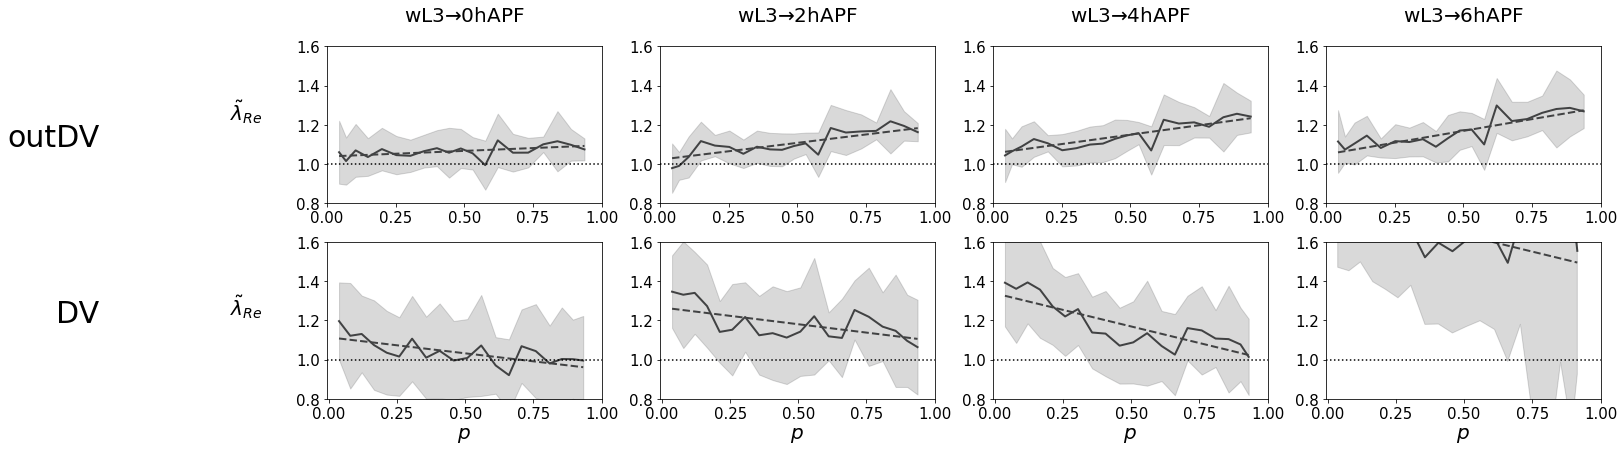

In [28]:
#rois = ['outDV', 'DV']
#devstages = ['upcrawling','whitePupa','2hAPF','4hAPF']


nbcols = len(devstage_combinations)
nbrows = len(rois)

fig,axs = plt.subplots(nbrows, nbcols,
                       figsize = (5*nbcols, (10/3)*nbrows)
                      )
main_ax = fig.add_subplot(111, frameon=False)


for i in range(nbrows):
    
    roi = rois[i]
    
    for j in range(nbcols):
        
        devstage_init = devstage_combinations.loc[j,'devstage_init']
        devstage_final = devstage_combinations.loc[j,'devstage_final']
        
        query_str = '(devstage_init == "' + devstage_init + '") & (devstage_final == "' + devstage_final + '") & (roi == "' + roi + '")'
        
        if nbcols == 1:
            ax = axs[i]
        elif nbrows == 1:
            ax = axs[j]
        else:
            ax = axs[i,j]
            
        title = ''
        ylabel = ''
        xlabel = ''
        xticks = None
        yticks = None
        xlim = None
        ylim = None
        if i == 0:
            title = devstage_init + r'$ \to $' + devstage_final
        if j == 0:
            ylabel = r'$\tilde{\lambda}_{Re}$'
        if i == nbrows-1:
            xlabel = r'$p$'
        if roi == 'DV':
            xticks = [0, 0.25, 0.5, 0.75, 1]
            #yticks = [1, 1.5, 2.0] 
            #xlim = (0,155)
            ylim = (0.8, 1.6) 
        else:
            xticks = [0, 0.25, 0.5, 0.75, 1]
            #yticks = [1, 1.2, 1.4,]
            #xlim = (0,780)
            ylim = (0.8, 1.6)
        
        ax = get_subplot(ax, df = None,#k_diff, 
                         stat_df=k_diff_stat, query_str = query_str, x_col = 'ref_pathlength_scaled_beta_mean', y_col = 'lambda_rearrangement', 
                         mean_color=color_dict[devstage_init], mean_linewidth=2,
                         xlabel = xlabel, ylabel = ylabel, title = title,
                         xticks = xticks, yticks = yticks, xlim = xlim, ylim = ylim,
                        )
        ax = get_subplot(ax, df = None, 
                         stat_df = k_diff_stat, query_str = query_str, 
                         x_col_mean='ref_pathlength_scaled_beta_mean', y_col_mean ='fit_lambda_rearrangement',
                         mean_color=color_dict[devstage_init], mean_linewidth=2,
                         xlabel = xlabel, ylabel = ylabel, title = title,
                         xticks = xticks, yticks = yticks, xlim = xlim, ylim = ylim,
                         mean_linestyle='--',error_style = None, mean_label = 'fit'
                        )
        #ax.legend()
        ax.grid(visible = False)
        ax.axhline(y = 1, color = "black", linestyle = "dotted")
        
        
fig.tight_layout()

plt.xlabel('', fontsize = 40, labelpad = 30)
plt.ylabel('', fontsize = 40, labelpad = 70, rotation = 0)

plt.xlim(-0.5,nbcols -0.5)
plt.ylim(-0.5, nbrows -0.5)
        
#tick_intervals_x = col_vals
tick_intervals_y = [0, 1]

#tick_intervals_x_str = [str(round(x,2)) for x in tick_intervals_x]
tick_intervals_y_str = ['DV', 'outDV']

main_ax.tick_params(axis=u'both', which=u'both', length = 0, labelsize = 15, 
                    pad = 100, # if two columns
                    #pad = 30, #if four columns
                    rotation = 0)

#plt.xticks(range(len(col_vals)), tick_intervals_x_str, fontsize = 40)
main_ax.set_yticks(tick_intervals_y)
main_ax.set_yticklabels(tick_intervals_y_str, fontsize = 30, x = -0.1)

#main_ax.axvline(x = 0.42, color = 'blue', linewidth = 5)

main_ax.set_xticks([])
#plt.yticks([], [], fontsize = 40)



#os.makedirs('plots/',exist_ok=True)
#plt.savefig('plots/lambda_rearrangement_twoPanels.pdf', bbox_inches = 'tight')

In [29]:
#Printing the fit lines

for i in range(len(rois)):
    roi = rois[i]
    
    for j in range(len(devstage_combinations)):
    
        devstage_init = devstage_combinations.loc[j,'devstage_init']
        devstage_final = devstage_combinations.loc[j,'devstage_final']
        query_str = '(devstage_init == "' + devstage_init + '") & (devstage_final == "' + devstage_final + '") & (roi == "' + roi + '")'
        
        df_roi_devstage = k_diff_stat.query(query_str).reset_index(drop = True)
        coeffs = df_roi_devstage.loc[0,'fit_lambda_rearrangement_coeffs']
        #coeffs = coeffs_orig
        #coeffs[0] = coeffs[0]/k_scaled_dist_dict[roi]
        
        print(roi + ' : ' + devstage_init + ' to ' + devstage_final)
        #print('x = scaled in-surface distance')
        #to convert from k to scaled dist, we divide by the slope m where P_scaled = m.k_dist
        #assuming straight line
        print(np.poly1d(coeffs))
        #assuming straight line
        print('\n')
        
        if roi == 'DV':
            prop_name = "inDV_lambda_rearrangement_coeffs"
        else:
            prop_name = "lambda_rearrangement_coeffs"
            
        row = pd.DataFrame({
            'stage' : j,
            'stage_init' : devstage_init,
            'stage_final' : devstage_final,
            'stage_name' : devstage_init + " to " + devstage_final,
            'prop' : prop_name,
            'value' : [coeffs],
        })
        stages_df = pd.concat([stages_df, row])
        
        

outDV : wL3 to 0hAPF
 
0.0578 x + 1.038


outDV : wL3 to 2hAPF
 
0.1714 x + 1.022


outDV : wL3 to 4hAPF
 
0.1917 x + 1.054


outDV : wL3 to 6hAPF
 
0.24 x + 1.049


DV : wL3 to 0hAPF
 
-0.1636 x + 1.114


DV : wL3 to 2hAPF
 
-0.1708 x + 1.266


DV : wL3 to 4hAPF
 
-0.338 x + 1.338


DV : wL3 to 6hAPF
 
-0.338 x + 1.804




## Getting anisotropic lambda as product of elongation and rearrangement

In [30]:
#Printing the fit lines

k_diff_stat['fit_tot_anisotropic'] = None
el_diff_stat['fit_tot_anisotropic'] = None

for i in range(len(rois)):
    roi = rois[i]
    
    for j in range(len(devstage_combinations)):
    
        devstage_init = devstage_combinations.loc[j,'devstage_init']
        devstage_final = devstage_combinations.loc[j,'devstage_final']
        query_str = '(devstage_init == "' + devstage_init + '") & (devstage_final == "' + devstage_final + '") & (roi == "' + roi + '")'
        
        rearrangement_temp_df = k_diff_stat.query(query_str)
        df_roi_devstage = rearrangement_temp_df.reset_index(drop = True)
        coeffs_rearrangement = df_roi_devstage.loc[0,'fit_lambda_rearrangement_coeffs']
        #coeffs_rearrangement_scaled = [coeffs_rearrangement[0]/k_scaled_dist_dict[roi], coeffs_rearrangement[1]]
        
        elongation_temp_df = el_diff_stat.query(query_str)
        df_roi_devstage = elongation_temp_df.reset_index(drop = True)
        coeffs_elongation = df_roi_devstage.loc[0,'fit_exp_signed_Qnorm_coeffs']
        #coeffs_elongation_scaled = [coeffs_elongation[0]/k_scaled_dist_dict[roi], coeffs_elongation[1]]
        #coeffs = coeffs_orig
        #coeffs[0] = coeffs[0]/k_scaled_dist_dict[roi]
        
        coeffs_anisotropic = np.polymul(coeffs_rearrangement, coeffs_elongation)
        #coeffs_anisotropic_scaled = np.polymul(coeffs_rearrangement_scaled, coeffs_elongation_scaled)
        
        poly_obj = np.poly1d(coeffs_anisotropic)
        #poly_obj_scaled = np.poly1d(coeffs_anisotropic_scaled)
        print(roi + ' : ' + devstage_init + ' to ' + devstage_final)
        #print('x = scaled in-surface distance')
        #to convert from k to scaled dist, we divide by the slope m where P_scaled = m.k_dist
        #assuming straight line
        print(np.poly1d(coeffs_anisotropic))
        #assuming straight line
        print('\n')
        
        k_diff_stat.loc[rearrangement_temp_df.index,'fit_tot_anisotropic'] = poly_obj(k_diff_stat.loc[rearrangement_temp_df.index,'ref_pathlength_scaled_beta_mean'].values)
        el_diff_stat.loc[elongation_temp_df.index,'fit_tot_anisotropic'] = poly_obj(el_diff_stat.loc[elongation_temp_df.index,'ref_pathlength_scaled_beta_mean'].values)
        
        if roi == 'DV':
            prop_name = "inDV_lambda_anisotropic_coeffs"
        else:
            prop_name = "lambda_anisotropic_coeffs"
            
        row = pd.DataFrame({
            'stage' : j,
            'stage_init' : devstage_init,
            'stage_final' : devstage_final,
            'stage_name' : devstage_init + " to " + devstage_final,
            'prop' : prop_name,
            'value' : [coeffs_anisotropic],
        })
        stages_df = pd.concat([stages_df, row])

#k_diff_stat['fit_tot_anisotropic'] = np.poly1d(coeffs_anisotropic_scaled)(k_diff_stat['k_beta'])
#el_diff_stat['fit_tot_anisotropic'] = np.poly1d(coeffs_anisotropic_scaled)(el_diff_stat['k_beta'])

outDV : wL3 to 0hAPF
           2
-0.004429 x - 0.0217 x + 1.038


outDV : wL3 to 2hAPF
           2
-0.006442 x + 0.1254 x + 0.9765


outDV : wL3 to 4hAPF
           2
-0.009308 x + 0.1376 x + 1.037


outDV : wL3 to 6hAPF
          2
0.002656 x + 0.2484 x + 1.035


DV : wL3 to 0hAPF
          2
0.007556 x - 0.2265 x + 1.192


DV : wL3 to 2hAPF
         2
0.01209 x - 0.2779 x + 1.395


DV : wL3 to 4hAPF
         2
0.02343 x - 0.4289 x + 1.331


DV : wL3 to 6hAPF
         2
0.04233 x - 0.582 x + 1.901




[]

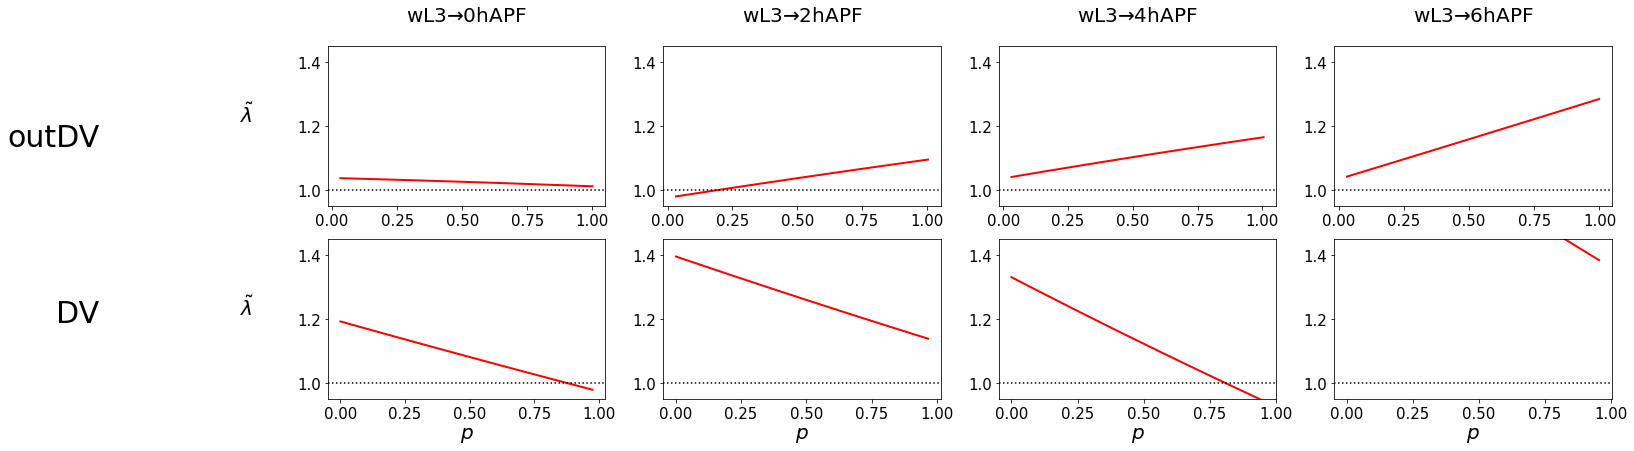

In [31]:
#rois = ['outDV', 'DV']
#devstages = ['upcrawling','whitePupa','2hAPF','4hAPF']


nbcols = len(devstage_combinations)
nbrows = len(rois)

fig,axs = plt.subplots(nbrows, nbcols,
                       figsize = (5*nbcols, (10/3)*nbrows)
                      )
main_ax = fig.add_subplot(111, frameon=False)


for i in range(nbrows):
    
    roi = rois[i]
    
    for j in range(nbcols):
        
        devstage_init = devstage_combinations.loc[j,'devstage_init']
        devstage_final = devstage_combinations.loc[j,'devstage_final']
        
        query_str = '(devstage_init == "' + devstage_init + '") & (devstage_final == "' + devstage_final + '") & (roi == "' + roi + '")'
        
        if nbcols == 1:
            ax = axs[i]
        elif nbrows == 1:
            ax = axs[j]
        else:
            ax = axs[i,j]
            
        title = ''
        ylabel = ''
        xlabel = ''
        xticks = None
        yticks = None
        xlim = None
        ylim = None
        if i == 0:
            title = devstage_init + r'$ \to $' + devstage_final
        if j == 0:
            ylabel = r'$\tilde{\lambda}$'
        if i == nbrows-1:
            xlabel = r'$p$'
        if roi == 'DV':
            xticks = [0, 0.25, 0.5, 0.75, 1]
            yticks = [1, 1.2, 1.4,] 
            #xlim = (0,155)
            ylim = (0.95, 1.45) 
        else:
            xticks = [0, 0.25, 0.5, 0.75, 1]
            yticks = [1, 1.2, 1.4,]
            #xlim = (0,780)
            ylim = (0.95, 1.45)
        

        #ax = get_subplot(ax, df = None, 
        #                 stat_df = k_diff_stat, query_str = query_str, 
        #                 x_col_mean='ref_pathlength_scaled_beta_mean', y_col_mean ='fit_lambda_rearrangement',
        #                 mean_color='purple', 
        #                 mean_linewidth=2, mean_label='Rearrangement',
        #                 xlabel = xlabel, ylabel = ylabel, title = title,
        #                 xticks = xticks, yticks = yticks, xlim = xlim, ylim = ylim,
        #                 mean_linestyle='-',error_style = None,
        #                )
        
        
        #ax = get_subplot(ax, df = None, 
        #                 stat_df = el_diff_stat, query_str = query_str, 
        #                 x_col_mean='ref_pathlength_scaled_beta_mean', y_col_mean ='fit_exp_signed_Qnorm_diff',
        #                 mean_color='green', 
        #                 mean_linewidth=2, mean_label='Elongation',
        #                 xlabel = xlabel, ylabel = ylabel, title = title,
        #                 xticks = xticks, yticks = yticks, xlim = xlim, ylim = ylim,
        #                 mean_linestyle='-',error_style = None,
        #                )
        
        ax = get_subplot(ax, df = None, 
                         stat_df = el_diff_stat, query_str = query_str, 
                         x_col_mean='ref_pathlength_scaled_beta_mean', y_col_mean ='fit_tot_anisotropic',
                         mean_color='red', 
                         mean_linewidth=2, mean_label='Total',
                         xlabel = xlabel, ylabel = ylabel, title = title,
                         xticks = xticks, yticks = yticks, xlim = xlim, ylim = ylim,
                         mean_linestyle='-',error_style = None,
                        )
        
        
        #ax.legend()
        ax.grid(visible=False)
        ax.axhline(y = 1, color = "black", linestyle = "dotted")
        
fig.tight_layout()

plt.xlabel('', fontsize = 40, labelpad = 30)
plt.ylabel('', fontsize = 40, labelpad = 70, rotation = 0)

plt.xlim(-0.5,nbcols -0.5)
plt.ylim(-0.5, nbrows -0.5)
        
#tick_intervals_x = col_vals
tick_intervals_y = [0, 1]

#tick_intervals_x_str = [str(round(x,2)) for x in tick_intervals_x]
tick_intervals_y_str = ['DV', 'outDV']

main_ax.tick_params(axis=u'both', which=u'both', length = 0, labelsize = 15, 
                    pad = 100, # if two columns
                    #pad = 30, #if four columns
                    rotation = 0)

#plt.xticks(range(len(col_vals)), tick_intervals_x_str, fontsize = 40)
main_ax.set_yticks(tick_intervals_y)
main_ax.set_yticklabels(tick_intervals_y_str, fontsize = 30, x = -0.1)

#main_ax.axvline(x = 0.42, color = 'blue', linewidth = 5)

main_ax.set_xticks([])
#plt.yticks([], [], fontsize = 40)



#os.makedirs('plots/',exist_ok=True)
#plt.savefig('plots/lambda_rearrangement_twoPanels.pdf', bbox_inches = 'tight')

### Height analysis

In [32]:
#There are four different files with the data

df_names = ["../exp_data/height_volume/ecadGFPnbG4HeightVolumneTrunkated-acrossDV.pkl",
            "../exp_data/height_volume/ecadGFPnbG4HeightVolumneTrunkated-alongDV.pkl",
            "../exp_data/height_volume/ecadGFPnbG4myoVIHeightVolumneTrunkated-acrossDV.pkl",
            "../exp_data/height_volume/ecadGFPnbG4myoVIHeightVolumneTrunkated-alongDV.pkl"
           ]
#combine all files into a single dataframe
df_Height = pd.DataFrame()
for df_name in df_names:
    df_Height = pd.concat([df_Height, pd.read_pickle(df_name)])

devstage_map = {
                "96hAEL":"96hAEL",
                "120hAEL":"120hAEL",
                "upcrawling":"wL3",
                "whitePupa":"0hAPF",
                "2hAPF":"2hAPF",
                "4hAPF":"4hAPF",
                "6hAPF":"6hAPF",
               }
df_Height["devstage"] = [devstage_map[x] for x in df_Height["devstage"].values]
df_Height = df_Height.rename(columns={"disc": "discName"})
df_Height = df_Height[df_Height['genotype'] == genotype]
df = df_Height
df

,genotype,devstage,discName,region,k_dist,cell_id,k_dist_pathlength,area,linelength,height,volume,distanceFraction,k_fromDV,roi
0,ecadGFPnbG4,96hAEL,20220517_ecadGFPnbG4_96hAEL_disc8,outDV,13,10439,26.362206,2.606868,26.0,24.400000,63.607569,0.820286,NaN,NaN
1,ecadGFPnbG4,96hAEL,20220517_ecadGFPnbG4_96hAEL_disc8,outDV,13,10439,26.362206,2.606868,26.0,24.500000,63.868255,0.820286,NaN,NaN
2,ecadGFPnbG4,96hAEL,20220517_ecadGFPnbG4_96hAEL_disc8,outDV,13,10439,26.362206,2.606868,26.0,22.500000,58.654520,0.820286,NaN,NaN
3,ecadGFPnbG4,96hAEL,20220517_ecadGFPnbG4_96hAEL_disc8,outDV,13,11563,26.416047,1.512509,26.0,24.400000,36.905231,0.821961,NaN,NaN
4,ecadGFPnbG4,96hAEL,20220517_ecadGFPnbG4_96hAEL_disc8,outDV,13,11563,26.416047,1.512509,26.0,24.500000,37.056482,0.821961,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11115,ecadGFPnbG4,6hAPF,20210125_ecadGFPnbG4_6hAPF_disc1,DV,16,10190,76.284186,12.297602,76.0,14.894083,183.161502,0.439566,0.0,DV
11116,ecadGFPnbG4,6hAPF,20210125_ecadGFPnbG4_6hAPF_disc1,DV,16,10214,75.976055,18.665503,76.0,14.894083,278.005556,0.437791,0.0,DV
11117,ecadGFPnbG4,6hAPF,20210125_ecadGFPnbG4_6hAPF_disc1,DV,16,10271,76.240580,16.010056,76.0,14.894083,238.455110,0.439315,0.0,DV
11118,ecadGFPnbG4,6hAPF,20210125_ecadGFPnbG4_6hAPF_disc1,DV,16,10291,76.669082,15.909135,77.0,15.527188,247.024136,0.441784,0.0,DV


In [33]:
groupby_cols = ['devstage', 'region', 'discName', 'k_dist']
#here we pool cells within a ring and calculate the mean and std
df_pool_k = df.groupby(groupby_cols).agg('mean').reset_index() 
#we offset k_dist values if the rings do not start with k_dits = 0
k_dist_offset = df.groupby(['discName']).k_dist.agg('min')#.reset_index().set_index('discName') #some discs can have k starting from non-zero value, so we offset them by the starting k
#df_pool_k['k_dist'] = df_pool_k['k_dist'] - k_dist_offset[df_pool_k['discName'].values].values #offsetting k values


#scale pathlength
pathlength_max = df_pool_k.groupby(['discName']).k_dist_pathlength.agg('max')
df_pool_k['pathlength_scaled'] = df_pool_k['k_dist_pathlength']/pathlength_max[df_pool_k['discName'].values].values

In [34]:
groupby_cols = ['devstage', 'region', 'k_dist']
#here we pool discs within a devstage and calculate the mean and std
df_pool_devstage = df_pool_k.groupby(groupby_cols).agg(['mean', 'std']).reset_index()
colnames = [x[0]+'_'+x[1] if x[0] not in groupby_cols else x[0] for x in df_pool_devstage.columns]
df_pool_devstage.columns = colnames #removing multi-indexing

df_pool_devstage.head()

,devstage,region,k_dist,cell_id_mean,cell_id_std,k_dist_pathlength_mean,k_dist_pathlength_std,area_mean,area_std,linelength_mean,...,height_mean,height_std,volume_mean,volume_std,distanceFraction_mean,distanceFraction_std,k_fromDV_mean,k_fromDV_std,pathlength_scaled_mean,pathlength_scaled_std
0,0hAPF,DV,0,10575.842857,242.062470,0.000000,0.000000,6.138776,1.899830,0.000000,...,35.728751,3.450837,214.481586,52.654957,0.000000,0.000000,0.0,0.0,0.000000,0.000000
1,0hAPF,DV,1,10613.352387,110.687154,2.740585,0.197002,7.049269,0.976519,2.771303,...,35.664722,3.429032,249.595224,27.747053,0.032621,0.001879,0.0,0.0,0.035095,0.001250
2,0hAPF,DV,2,10534.355983,141.625504,5.952463,0.394122,6.803410,0.972501,5.927690,...,35.571150,3.465918,239.662778,19.986769,0.070965,0.005600,0.0,0.0,0.076312,0.004181
3,0hAPF,DV,3,10515.141896,132.495449,9.463610,0.746017,6.795584,1.264079,9.442669,...,35.660233,3.568059,239.837254,31.293652,0.112913,0.011232,0.0,0.0,0.121321,0.008412
4,0hAPF,DV,4,10571.566821,150.008576,12.758039,1.085376,6.757545,1.057610,12.749598,...,35.542429,3.593406,238.444880,30.935569,0.152149,0.014992,0.0,0.0,0.163503,0.011652


[]

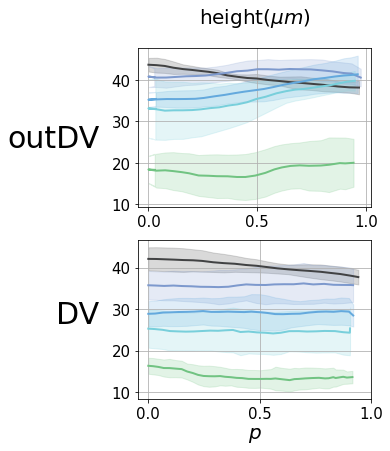

In [35]:
#rois = ['outDV', 'DV']
#devstages = ['upcrawling','whitePupa','2hAPF','4hAPF']
devstages = ["wL3","0hAPF","2hAPF","4hAPF","6hAPF",]

nbcols = 1
nbrows = len(rois)

fig,axs = plt.subplots(nbrows, nbcols,
                       figsize = (4.5*nbcols, (10/3)*nbrows)
                      )
main_ax = fig.add_subplot(111, frameon=False)


for i in range(nbrows):
    
    roi = rois[i]
    
    for j in range(len(devstages)):
        
        devstage = devstages[j]
        query_str = '(devstage == "' + devstage + '") & (region == "' + roi + '")'
        
        if nbcols == 1:
            ax = axs[i]
        elif nbrows == 1:
            ax = axs[j]
        else:
            ax = axs[i,j]
            
        title = ''
        ylabel = ''
        xlabel = ''
        xticks = None
        yticks = None
        xlim = None
        ylim = None
        if i == 0:
            title = 'height' + r'$(\mu m)$' 
        if (j == 0) or (nbcols == 1):
            ylabel =''
        if (i == nbrows-1) or (nbrows == 1):
            xlabel = r'$p$'
        if roi == 'DV':
            xticks = [0, 0.5, 1]
            #yticks = [0, 10, 20]
            #xlim = (0,1)
            #ylim = (-2, 27)
        else:
            xticks = [0, 0.5, 1]
            #yticks = [0, 10, 20]
            #xlim = (0,1)
            #ylim = (-2, 27)
        
        ax = get_subplot(ax, df = None,  #df_pool_k, 
                         stat_df = df_pool_devstage, df_cases_col='discName',
                         query_str = query_str, x_col = 'distanceFraction', y_col = 'height', 
                         xlabel = xlabel, ylabel = ylabel, title = title,
                         xticks = xticks, yticks = yticks, xlim = xlim, ylim = ylim,
                         individual_color=color_dict[devstage],individual_linewidth =1.2, 
                         mean_color=color_dict[devstage],mean_linewidth =2,
                         mean_label=devstage, ylabelpad = 0,
                        )
        
    ax.grid(visible=True)
    #ax.legend(fontsize = 12)
    
fig.tight_layout()

plt.xlabel('', fontsize = 40, labelpad = 30)
plt.ylabel('', fontsize = 40, labelpad = 70, rotation = 0)

plt.xlim(-0.5,nbcols -0.5)
plt.ylim(-0.5, nbrows -0.5)
        
#tick_intervals_x = col_vals
tick_intervals_y = [0, 1]

#tick_intervals_x_str = [str(round(x,2)) for x in tick_intervals_x]
tick_intervals_y_str = ['DV', 'outDV']

main_ax.tick_params(axis=u'both', which=u'both', length = 0, labelsize = 15, pad = 15, rotation = 0)

#plt.xticks(range(len(col_vals)), tick_intervals_x_str, fontsize = 40)
main_ax.set_yticks(tick_intervals_y)
main_ax.set_yticklabels(tick_intervals_y_str, fontsize = 30, x = -0.1)

#main_ax.axvline(x = 0.42, color = 'blue', linewidth = 5)

main_ax.set_xticks([])
#plt.yticks([], [], fontsize = 40)



#os.makedirs('plots/',exist_ok=True)
#plt.savefig('plots/k_vs_N.pdf', bbox_inches = 'tight')


In [36]:
df_Height

,genotype,devstage,discName,region,k_dist,cell_id,k_dist_pathlength,area,linelength,height,volume,distanceFraction,k_fromDV,roi
0,ecadGFPnbG4,96hAEL,20220517_ecadGFPnbG4_96hAEL_disc8,outDV,13,10439,26.362206,2.606868,26.0,24.400000,63.607569,0.820286,NaN,NaN
1,ecadGFPnbG4,96hAEL,20220517_ecadGFPnbG4_96hAEL_disc8,outDV,13,10439,26.362206,2.606868,26.0,24.500000,63.868255,0.820286,NaN,NaN
2,ecadGFPnbG4,96hAEL,20220517_ecadGFPnbG4_96hAEL_disc8,outDV,13,10439,26.362206,2.606868,26.0,22.500000,58.654520,0.820286,NaN,NaN
3,ecadGFPnbG4,96hAEL,20220517_ecadGFPnbG4_96hAEL_disc8,outDV,13,11563,26.416047,1.512509,26.0,24.400000,36.905231,0.821961,NaN,NaN
4,ecadGFPnbG4,96hAEL,20220517_ecadGFPnbG4_96hAEL_disc8,outDV,13,11563,26.416047,1.512509,26.0,24.500000,37.056482,0.821961,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11115,ecadGFPnbG4,6hAPF,20210125_ecadGFPnbG4_6hAPF_disc1,DV,16,10190,76.284186,12.297602,76.0,14.894083,183.161502,0.439566,0.0,DV
11116,ecadGFPnbG4,6hAPF,20210125_ecadGFPnbG4_6hAPF_disc1,DV,16,10214,75.976055,18.665503,76.0,14.894083,278.005556,0.437791,0.0,DV
11117,ecadGFPnbG4,6hAPF,20210125_ecadGFPnbG4_6hAPF_disc1,DV,16,10271,76.240580,16.010056,76.0,14.894083,238.455110,0.439315,0.0,DV
11118,ecadGFPnbG4,6hAPF,20210125_ecadGFPnbG4_6hAPF_disc1,DV,16,10291,76.669082,15.909135,77.0,15.527188,247.024136,0.441784,0.0,DV


[]

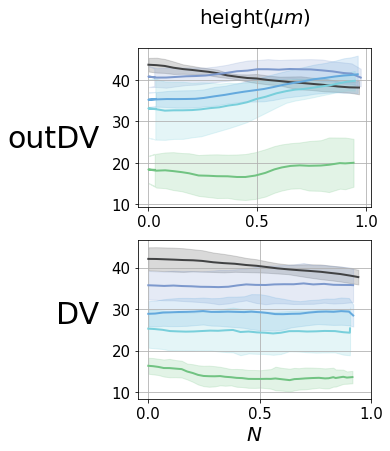

In [37]:
#rois = ['outDV', 'DV']
#devstages = ['upcrawling','whitePupa','2hAPF','4hAPF']
devstages = ["wL3","0hAPF","2hAPF","4hAPF","6hAPF",]

nbcols = 1
nbrows = len(rois)

fig,axs = plt.subplots(nbrows, nbcols,
                       figsize = (4.5*nbcols, (10/3)*nbrows)
                      )
main_ax = fig.add_subplot(111, frameon=False)


for i in range(nbrows):
    
    roi = rois[i]
    
    for j in range(len(devstages)):
        
        devstage = devstages[j]
        query_str = '(devstage == "' + devstage + '") & (region == "' + roi + '")'
        
        if nbcols == 1:
            ax = axs[i]
        elif nbrows == 1:
            ax = axs[j]
        else:
            ax = axs[i,j]
            
        title = ''
        ylabel = ''
        xlabel = ''
        xticks = None
        yticks = None
        xlim = None
        ylim = None
        if i == 0:
            title = 'height' + r'$(\mu m)$' 
        if (j == 0) or (nbcols == 1):
            ylabel =''
        if (i == nbrows-1) or (nbrows == 1):
            xlabel = r'$N$'
        if roi == 'DV':
            xticks = [0, 0.5, 1]
            #yticks = [0, 10, 20]
            #xlim = (0,1)
            #ylim = (-2, 27)
        else:
            xticks = [0, 0.5, 1]
            #yticks = [0, 10, 20]
            #xlim = (0,1)
            #ylim = (-2, 27)
        
        ax = get_subplot(ax, df = None,  #df_pool_k, 
                         stat_df = df_pool_devstage, df_cases_col='discName',
                         query_str = query_str, x_col = 'distanceFraction', y_col = 'height', 
                         xlabel = xlabel, ylabel = ylabel, title = title,
                         xticks = xticks, yticks = yticks, xlim = xlim, ylim = ylim,
                         individual_color=color_dict[devstage],individual_linewidth =1.2, 
                         mean_color=color_dict[devstage],mean_linewidth =2,
                         mean_label=devstage, ylabelpad = 0,
                        )
        
    ax.grid(visible=True)
    #ax.legend(fontsize = 12)
    
fig.tight_layout()

plt.xlabel('', fontsize = 40, labelpad = 30)
plt.ylabel('', fontsize = 40, labelpad = 70, rotation = 0)

plt.xlim(-0.5,nbcols -0.5)
plt.ylim(-0.5, nbrows -0.5)
        
#tick_intervals_x = col_vals
tick_intervals_y = [0, 1]

#tick_intervals_x_str = [str(round(x,2)) for x in tick_intervals_x]
tick_intervals_y_str = ['DV', 'outDV']

main_ax.tick_params(axis=u'both', which=u'both', length = 0, labelsize = 15, pad = 15, rotation = 0)

#plt.xticks(range(len(col_vals)), tick_intervals_x_str, fontsize = 40)
main_ax.set_yticks(tick_intervals_y)
main_ax.set_yticklabels(tick_intervals_y_str, fontsize = 30, x = -0.1)

#main_ax.axvline(x = 0.42, color = 'blue', linewidth = 5)

main_ax.set_xticks([])
#plt.yticks([], [], fontsize = 40)



#os.makedirs('plots/',exist_ok=True)
#plt.savefig('plots/k_vs_N.pdf', bbox_inches = 'tight')


In [38]:
#devstage_combinations = pd.DataFrame({'devstage_init':[#'96hAEL',
#                                                       'wL3',
#                                                       '4hAPF',
#                                                       #'wL3','0hAPF','2hAPF', '4hAPF'
#                                                      ],
#                                     'devstage_final':[#'upcrawling',
#                                                       '4hAPF',
#                                                       '6hAPF',
#                                                       #'0hAPF','2hAPF','4hAPF', '6hAPF'
#                                                      ],}
#                                    )

prop = 'height'

[height_diff, height_diff_stat] = get_prop_diff_vs_dist(df_pool_k, prop = prop,operation = 'divide',
                                                   devstage_combinations=devstage_combinations, fit_deg=fit_deg
                                              )


[]

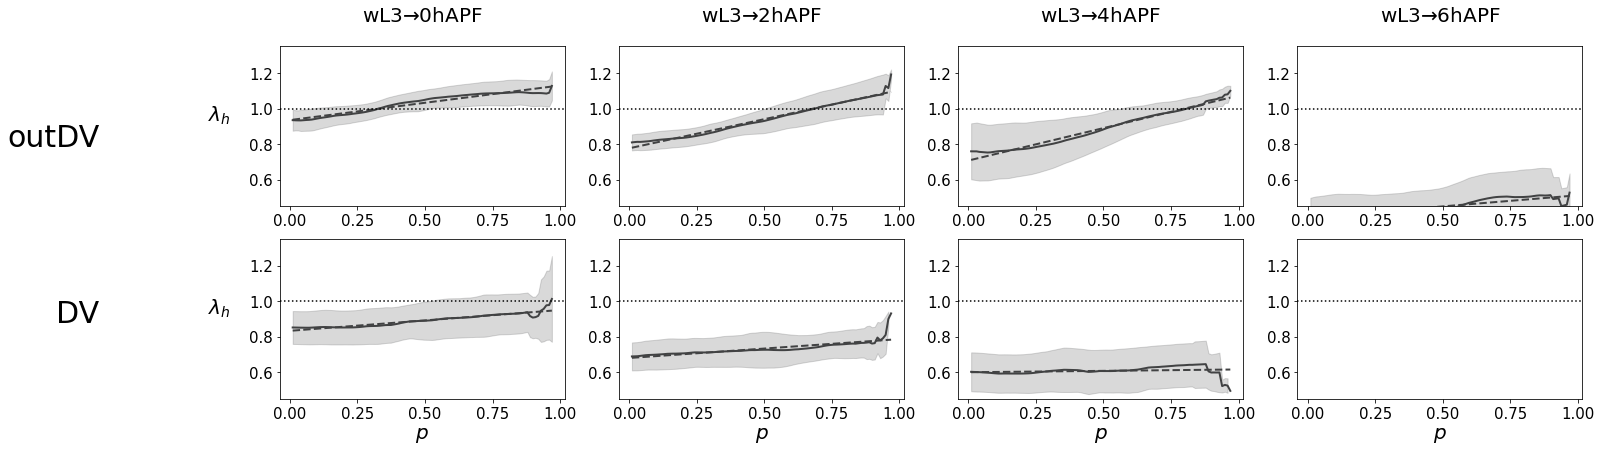

In [39]:
#rois = ['outDV', 'DV']
#devstages = ['upcrawling','whitePupa','2hAPF','4hAPF']


nbcols = len(devstage_combinations)
nbrows = len(rois)

fig,axs = plt.subplots(nbrows, nbcols,
                       figsize = (5*nbcols, (10/3)*nbrows)
                      )
main_ax = fig.add_subplot(111, frameon=False)


for i in range(nbrows):
    
    roi = rois[i]
    
    for j in range(nbcols):
        
        devstage_init = devstage_combinations.loc[j,'devstage_init']
        devstage_final = devstage_combinations.loc[j,'devstage_final']
        
        query_str = '(devstage_init == "' + devstage_init + '") & (devstage_final == "' + devstage_final + '") & (roi == "' + roi + '")'
        
        if nbcols == 1:
            ax = axs[i]
        elif nbrows == 1:
            ax = axs[j]
        else:
            ax = axs[i,j]
            
        title = ''
        ylabel = ''
        xlabel = ''
        xticks = None
        yticks = None
        xlim = None
        ylim = None
        if i == 0:
            title = devstage_init + r'$ \to $' + devstage_final
        if j == 0:
            ylabel = r'$\lambda_{h}$'
        if i == nbrows-1:
            xlabel = r'$p$'
        if roi == 'DV':
            xticks = [0, 0.25, 0.5, 0.75, 1]
            #yticks = [0.8,0.9,1,1.1, 1.2 ] 
            #xlim = (0,155)
            ylim = (0.45, 1.35) 
        else:
            xticks = [0, 0.25, 0.5, 0.75, 1]
            #yticks = [0.8, 0.9, 1, 1.1, 1.2]
            #xlim = (0,780)
            ylim = (0.45, 1.35)
        
        ax = get_subplot(ax, df = None, #el_diff, 
                         stat_df = height_diff_stat, query_str = query_str, x_col = 'dist_beta', y_col = prop+'_diff', 
                         mean_color = color_dict[devstage_init], mean_linewidth= 2, mean_alpha = 0.2, #properties of the mean line
                         xlabel = xlabel, ylabel = ylabel, title = title,
                         xticks = xticks, yticks = yticks, xlim = xlim, ylim = ylim,
                         error_style='fill_between'
                        )

        ax = get_subplot(ax, df = None, stat_df = height_diff_stat, query_str = query_str, 
                         x_col_mean='dist_beta', y_col_mean ='fit_'+prop+'_diff',
                         xlabel = xlabel, ylabel = ylabel, title = title, ylabelpad=30,
                         xticks = xticks, yticks = yticks, xlim = xlim, ylim = ylim,
                         mean_linewidth=2,mean_color = color_dict[devstage_init], mean_linestyle='--',
                         error_style = None, mean_label = 'fit'
                        )
        
        #ax.legend()
        ax.grid(visible = False)
        ax.axhline(y = 1, color ="black", linestyle = "dotted")
        
        
fig.tight_layout()

plt.xlabel('', fontsize = 40, labelpad = 30)
plt.ylabel('', fontsize = 40, labelpad = 70, rotation = 0)

plt.xlim(-0.5,nbcols -0.5)
plt.ylim(-0.5, nbrows -0.5)
        
#tick_intervals_x = col_vals
tick_intervals_y = [0, 1]

#tick_intervals_x_str = [str(round(x,2)) for x in tick_intervals_x]
tick_intervals_y_str = ['DV', 'outDV']

main_ax.tick_params(axis=u'both', which=u'both', length = 0, labelsize = 15, 
                    pad = 50, # if two columns
                    #pad = 30, #if four columns
                    rotation = 0)

#plt.xticks(range(len(col_vals)), tick_intervals_x_str, fontsize = 40)
main_ax.set_yticks(tick_intervals_y)
main_ax.set_yticklabels(tick_intervals_y_str, fontsize = 30, x = -0.1)

#main_ax.axvline(x = 0.42, color = 'blue', linewidth = 5)

main_ax.set_xticks([])
#plt.yticks([], [], fontsize = 40)



#os.makedirs('plots/',exist_ok=True)
#plt.savefig('plots/DDk_Dt_twoPanels.pdf', bbox_inches = 'tight')


In [40]:
#Printing the fit lines

for i in range(len(rois)):
    roi = rois[i]
    
    for j in range(len(devstage_combinations)):
    
        devstage_init = devstage_combinations.loc[j,'devstage_init']
        devstage_final = devstage_combinations.loc[j,'devstage_final']
        query_str = '(devstage_init == "' + devstage_init + '") & (devstage_final == "' + devstage_final + '") & (roi == "' + roi + '")'
        
        df_roi_devstage = height_diff_stat.query(query_str).reset_index(drop = True)
        coeffs = df_roi_devstage.loc[0,'fit_' + prop + '_coeffs']
        #coeffs = coeffs_orig
        #coeffs[0] = coeffs[0]/k_scaled_dist_dict[roi]
        
        print(roi + ' : ' + devstage_init + ' to ' + devstage_final)
        #print('x = scaled in-surface distance')
        #to convert from k to scaled dist, we divide by the slope m where P_scaled = m.k_dist
        #assuming straight line
        print(np.poly1d(coeffs))
        #assuming straight line
        print('\n')
        
        if roi == 'DV':
            prop_name = "inDV_lambda_height_coeffs"
        else:
            prop_name = "lambda_height_coeffs"
            
        row = pd.DataFrame({
            'stage' : j,
            'stage_init' : devstage_init,
            'stage_final' : devstage_final,
            'stage_name' : devstage_init + " to " + devstage_final,
            'prop' : prop_name,
            'value' : [coeffs],
        })
        stages_df = pd.concat([stages_df, row])
        

outDV : wL3 to 0hAPF
 
0.1948 x + 0.9351


outDV : wL3 to 2hAPF
 
0.328 x + 0.7761


outDV : wL3 to 4hAPF
 
0.3655 x + 0.7071


outDV : wL3 to 6hAPF
 
0.125 x + 0.3864


DV : wL3 to 0hAPF
 
0.1172 x + 0.8329


DV : wL3 to 2hAPF
 
0.1064 x + 0.6798


DV : wL3 to 4hAPF
 
0.01568 x + 0.5996


DV : wL3 to 6hAPF
 
-0.01141 x + 0.3524




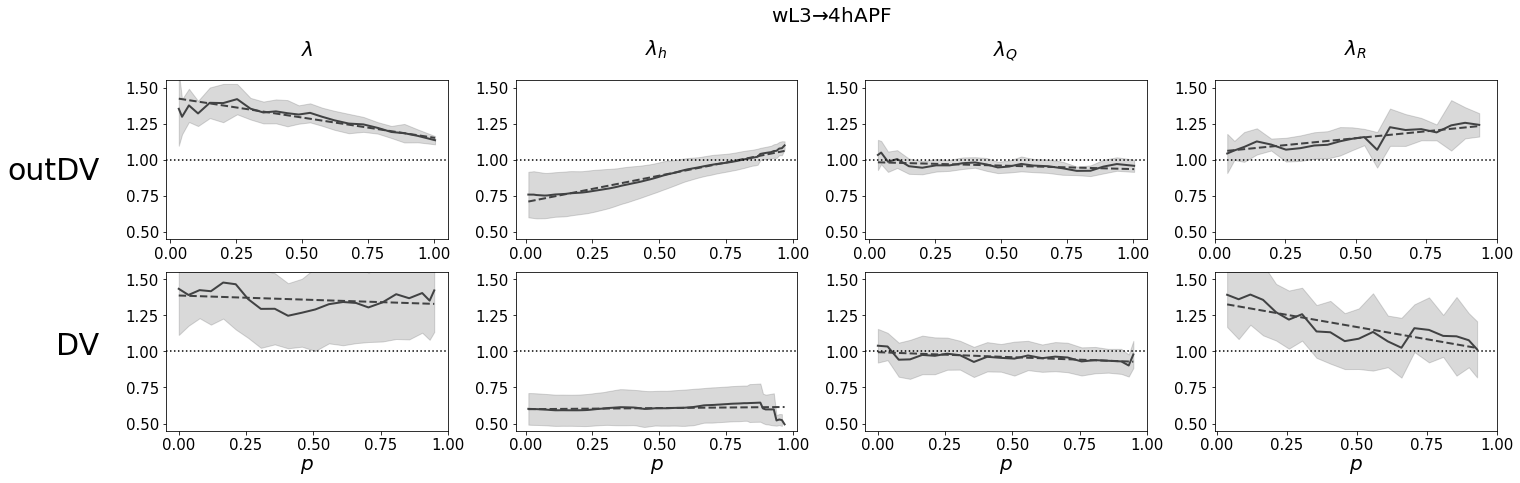

In [41]:
#rois = ['outDV', 'DV']
#devstages = ['upcrawling','whitePupa','2hAPF','4hAPF']

props = ["area_diff", "height_diff", "exp_signed_Qnorm_diff", "lambda_rearrangement"]
prop_dfs = [area_diff ,height_diff, el_diff, k_diff,]
stat_prop_dfs = [area_diff_stat, height_diff_stat, el_diff_stat, k_diff_stat,]
x_cols = [ 'ref_pathlength_scaled_beta_mean',  'dist_beta', 'ref_pathlength_scaled_beta_mean',  'ref_pathlength_scaled_beta_mean']
titles = [r'$\lambda$', r'$\lambda_h$', r'$\lambda_Q$', r'$\lambda_R$']

devstage_init = "wL3"
devstage_final = "4hAPF"

nbcols = len(props)
nbrows = len(rois)

fig,axs = plt.subplots(nbrows, nbcols,
                       figsize = (5*nbcols, (10/3)*nbrows)
                      )
main_ax = fig.add_subplot(111, frameon=False)


for i in range(nbrows):
    
    roi = rois[i]
    
    for j in range(nbcols):
        
        #devstage_init = devstage_combinations.loc[j,'devstage_init']
        #devstage_final = devstage_combinations.loc[j,'devstage_final']
        prop_df = prop_dfs[j]
        stat_prop_df = stat_prop_dfs[j]
        prop = props[j]
        x_col = x_cols[j]
        
        query_str = '(devstage_init == "' + devstage_init + '") & (devstage_final == "' + devstage_final + '") & (roi == "' + roi + '")'
        
        if nbcols == 1:
            ax = axs[i]
        elif nbrows == 1:
            ax = axs[j]
        else:
            ax = axs[i,j]
            
        title = ''
        ylabel = ''
        xlabel = ''
        xticks = None
        yticks = None
        xlim = None
        ylim = None
        if i == 0:
            title = titles[j] #devstage_init + r'$ \to $' + devstage_final
        #if j == 0:
        #    ylabel = r'$\lambda_{h}$'
        if i == nbrows-1:
            xlabel = r'$p$'
        if roi == 'DV':
            xticks = [0, 0.25, 0.5, 0.75, 1]
            #yticks = [0.8,0.9,1,1.1, 1.2 ] 
            #xlim = (0,155)
            ylim = (0.45, 1.55) 
        else:
            xticks = [0, 0.25, 0.5, 0.75, 1]
            #yticks = [0.8, 0.9, 1, 1.1, 1.2]
            #xlim = (0,780)
            ylim = (0.45, 1.55)
        
        ax = get_subplot(ax, df = None, #el_diff, 
                         stat_df = stat_prop_df, query_str = query_str, x_col = x_col, y_col = prop, 
                         mean_color = color_dict[devstage_init], mean_linewidth= 2, mean_alpha = 0.2, #properties of the mean line
                         xlabel = xlabel, ylabel = ylabel, title = title,
                         xticks = xticks, yticks = yticks, xlim = xlim, ylim = ylim,
                         error_style='fill_between'
                        )

        ax = get_subplot(ax, df = None, stat_df = stat_prop_df, query_str = query_str, 
                         x_col_mean=x_col, y_col_mean ='fit_'+prop,
                         xlabel = xlabel, ylabel = ylabel, title = title, ylabelpad=30,
                         xticks = xticks, yticks = yticks, xlim = xlim, ylim = ylim,
                         mean_linewidth=2,mean_color = color_dict[devstage_init], mean_linestyle='--',
                         error_style = None, mean_label = 'fit'
                        )
        
        #ax.legend()
        ax.grid(visible = False)
        ax.axhline(y = 1, color ="black", linestyle = "dotted")
        
        
fig.tight_layout()

plt.xlabel('', fontsize = 40, labelpad = 30)
plt.ylabel('', fontsize = 40, labelpad = 70, rotation = 0)

plt.xlim(-0.5,nbcols -0.5)
plt.ylim(-0.5, nbrows -0.5)
        
#tick_intervals_x = col_vals
tick_intervals_y = [0, 1]

#tick_intervals_x_str = [str(round(x,2)) for x in tick_intervals_x]
tick_intervals_y_str = ['DV', 'outDV']

main_ax.tick_params(axis=u'both', which=u'both', length = 0, labelsize = 15, 
                    pad = 0, # if two columns
                    #pad = 30, #if four columns
                    rotation = 0)

#plt.xticks(range(len(col_vals)), tick_intervals_x_str, fontsize = 40)
main_ax.set_yticks(tick_intervals_y)
main_ax.set_yticklabels(tick_intervals_y_str, fontsize = 30, 
                        x = -0.05, #-0.1
                       )

#main_ax.axvline(x = 0.42, color = 'blue', linewidth = 5)

main_ax.set_xticks([])
#plt.yticks([], [], fontsize = 40)

main_ax.set_title(devstage_init + r'$ \to $' + devstage_final, fontsize = 20, y = 1.15)



os.makedirs('plots/',exist_ok=True)
plt.savefig('plots/' + devstage_init + '_to_' + devstage_final + '_all_contributions.pdf', bbox_inches = 'tight')


In [42]:
stages_df = stages_df.reset_index(drop=True)

#stages_df.to_csv("../exp_data/stages_df.csv")
#pickle.dump(stages_df, open("../exp_data/stages_df.pkl", "wb"))
stages_df.to_csv("../simulation/to_run_local/stages_df_" + genotype + ".csv")
pickle.dump(stages_df, open("../simulation/to_run_local/stages_df_" + genotype + ".pkl", "wb"))
stages_df.to_csv("../simulation/cluster/stages_df_" + genotype + ".csv")
pickle.dump(stages_df, open("../simulation/cluster/stages_df_" + genotype + ".pkl", "wb"))
#stages_df.to_csv("../simulation/sample_data/data_version_latest/WT_StageWise_w_uniform_thickness_till_4hAPF/stages_df.csv")
#pickle.dump(stages_df, open("../simulation/sample_data/data_version_latest/WT_StageWise_w_uniform_thickness_till_4hAPF/stages_df.pkl", "wb"))

